In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lasio as ls
import tkinter as tk
from tkinter import filedialog
import welly
import welly.quality as wq

In [2]:
# the file No.1 : Gorgonichthys_1_suite3_supercombo_log.las ( put the file path according to your pc)
file_path1 =r"D:\Case study\Gorgonichthys_1_suite3_supercombo_log.las"

# the file No.2 : Gorgonichthys1_suite2_CMR_NUC_MAINLOG.las ( put the file path according to your pc)
file_path2 =r"D:\Case study\Gorgonichthys1_suite2_CMR_NUC_MAINLOG.las"

# the file No.3 : gorgonichthys_1_wire_public_2010_sdb.las ( put the file path according to your pc)
file_path3 =r"D:\Case study\gorgonichthys_1_wire_public_2010_sdb.las"

#las file reading using lasio library
las1 = ls.read(file_path1)
las2 = ls.read(file_path2)
las3 = ls.read(file_path3)

#creating pandas data frame of las file (Using lasio.read(file_path1).df())
#df1 (Gorgonichthys_1_suite3_supercombo_log) 
#df2 (Gorgonichthys1_suite2_CMR_NUC_MAINLOG)
#df3 (gorgonichthys_1_wire_public_2010_sdb)

df1 = las1.df()
df1 = df1.reset_index()

df2 = las2.df()
df2 = df2.reset_index()

df3 = las3.df()
df3 = df3.reset_index()


df3uv = pd.read_csv('processed_data.csv')

A quick look on the data from plotting them

# Applying the shale correction on the Nuetron porostiy to get effective Nuetron Porosity 

In [ ]:
import numpy as np
# Age of rock = Early Cretaceous
p05 = df3uv.GR.quantile(0.05)
p95 = df3uv.GR.quantile(0.95)
Igr = (df3uv['GR'] - p05) / (p95 - p05)  # gamma ray index
# Vshc calculation
Vshc_raw = 0.083 * (2 ** (3.7 * Igr) - 1)  # Vshc calculation for young tertiary rocks
Vshc = []

for i in Vshc_raw:
    if i >= 1:
        Vshc.append(1)
    else:
        Vshc.append(i)

# Rshc calculation
x = np.percentile(Vshc, 95)
NPHIshc = []
NPHI=df3uv['TNPH']
# Define a tolerance value
tol_val = 1  # Adjust this value as needed

for i in range(len(Vshc)):
    
        if Vshc[i]>=x and abs(df3uv.BS.iloc[i] - df3uv.CALI.iloc[i]) < tol_val:
            NPHIshc.append(NPHI.iloc[i])

NPHIshc=np.array(NPHIshc)   
NPHIshc_mean=NPHIshc.mean()      
print(NPHIshc_mean) 

Vshc=np.array(Vshc)
Nphi_correction=Vshc*NPHIshc_mean
NPHI=df3uv['TNPH']-Vshc*NPHIshc_mean

In [ ]:
# Create a new figure
fig = plt.figure(figsize=(15, 11))

# Create axes
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

# Plot Caliper
ax1.plot(df3uv['CALI'], df3uv['DEPTH'], 'black', label='Caliper', linewidth=0.9)
ax1.invert_yaxis()
ax1.grid(True, which='both', color='black', linestyle='--', linewidth=0.8)
ax1.set_ylabel('Depth (m)')
ax1.xaxis.set_ticks_position('both')
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))  # Minor ticks every 1 unit
ax1.tick_params(axis='x', which='both', top=True)
ax1.tick_params(axis='x', colors='black')
ax1.spines['top'].set_edgecolor('black')
ax1.xaxis.set_ticks_position('top')
ax1.set_xlabel('Caliper', color='black', fontsize=14)
ax1.xaxis.set_label_position('top')
ax1.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)



# Check the condition and plot horizontal lines
condition = abs(df3uv.BS - df3uv.CALI) > tol_val
for depth, is_condition_met in zip(df3uv.DEPTH, condition):
    if is_condition_met:
        ax1.axhline(y=depth, color='red', alpha=0.05)

# Plot Gamma Ray
ax2.plot(df3uv['GR'], df3uv['DEPTH'], 'b', label='Gamma Ray', linewidth=0.9)
ax2.invert_yaxis()
ax2.grid(True, which='both', color='black', linestyle='--', linewidth=0.8)
ax2.set_ylabel('Depth (m)')
ax2.xaxis.set_ticks_position('both')
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))  # Minor ticks every 1 unit
ax2.tick_params(axis='x', which='both', top=True)
ax2.tick_params(axis='x', colors='b')
ax2.spines['top'].set_edgecolor('b')
ax2.xaxis.set_ticks_position('top')
ax2.set_xlabel('Gamma Ray', color='b', fontsize=14)
ax2.xaxis.set_label_position('top')
ax2.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)

# Plot Porosity - Line Plot
ax3.plot(porosity_vulcan * 0.01, depth_uv, 'g', label='Porosity', linewidth=0.9)
ax3.invert_yaxis()
ax3.grid(True, which='both', color='black', linestyle='--', linewidth=0.8)
ax3.set_ylabel('Depth (m)')
ax3.xaxis.set_ticks_position('both')
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))  # Minor ticks every 1 unit
ax3.tick_params(axis='x', which='both', top=True)
ax3.tick_params(axis='x', colors='g')
ax3.spines['top'].set_edgecolor('g')
ax3.xaxis.set_ticks_position('top')
ax3.set_xlabel('CORPOR', color='g', fontsize=14)
ax3.xaxis.set_label_position('top')
ax3.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)

# Plot Porosity vs. DPHI
ax4.scatter(porosity_vulcan * 0.01, depth_uv, c='b', marker='.', label='Porosity', alpha=0.3)
ax4.plot(NPHI, df3uv['DEPTH'], 'r', label='NPHI', linewidth=0.9)
ax4.invert_yaxis()
ax4.grid(True, which='both', color='black', linestyle='--', linewidth=0.8)
ax4.grid(True, which='both', color='black', linestyle='--', linewidth=0.8)
ax4.set_ylabel('Depth (m)')
ax4.xaxis.set_ticks_position('both')
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))  # Minor ticks every 1 unit
ax4.tick_params(axis='x', which='both', top=True)
ax4.tick_params(axis='x', colors='r')
ax4.spines['top'].set_edgecolor('r')
ax4.xaxis.set_ticks_position('top')
ax4.set_xlabel('CORPOR / NPHI', color='r', fontsize=14)
ax4.xaxis.set_label_position('top')
ax4.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)

# Plot DPHI - Line Plot
ax5.plot(df3uv['PEF'], df3uv['DEPTH'], 'm', label='PEF', linewidth=0.9)
ax5.invert_yaxis()
ax5.grid(True, which='both', color='black', linestyle='--', linewidth=0.8)
ax5.set_xlabel('PEF')
ax5.xaxis.set_ticks_position('both')
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))  # Minor ticks every 1 unit
ax5.tick_params(axis='x', which='both', top=True)
ax5.tick_params(axis='x', colors='m')
ax5.spines['top'].set_edgecolor('m')
ax5.xaxis.set_ticks_position('top')
ax5.set_xlabel('PEF', color='m', fontsize=14)
ax5.xaxis.set_label_position('top')
ax5.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)
ax5.set_xlim(0, 10)

column_name ='PEF' # Use the correct dynamic column name
for j in range(len(depth_boundary) - 1):
    lower_boundary = depth_boundary[j]
    upper_boundary = depth_boundary[j + 1]
    section_data = df3uv[(df3uv['DEPTH'] > lower_boundary) & (df3uv['DEPTH'] < upper_boundary)]
    mean_value = section_data[column_name].mean()
    ax5.plot([mean_value, mean_value],[ lower_boundary, upper_boundary], color='yellow', linewidth=1)
    ax5.plot([df3uv[column_name].min(), df3uv[column_name].max()],[upper_boundary, upper_boundary], color='#FF1493', linewidth=1)


# Adjust layout and display the plot
y_min = min(df3uv['DEPTH'])
y_max = max(df3uv['DEPTH'])
ax1.set_ylim(y_max, y_min)
ax2.set_ylim(y_max, y_min)
ax3.set_ylim(y_max, y_min)
ax4.set_ylim(y_max, y_min)
ax5.set_ylim(y_max, y_min)
plt.suptitle("Nuetron Porosity and Core porosity comparison ", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
'''Total Porosity calculation'''
TPHI=[]
DEPT=[]
d=[]

for i in range(len(df3uv['DEPTH'])):
    d.append(df3uv['DEPTH'].iloc[i])
    

# Update the TPHI calculation block
TPHI = []

for i in range(len(d)):
    if (d[i] >= 3911.5 and d[i] <= 3940) or (d[i] >= 4112 and d[i] <= 4134) or (d[i] >= 4140 and d[i] <= 4193) or (d[i] >= 4200 and d[i] <= 4218):
        TPHI.append((NPHI.iloc[i] + DPHI.iloc[i]) / 2)
    else:
        TPHI.append(((NPHI.iloc[i] ** 2 + DPHI.iloc[i] ** 2) / 2) ** 0.5)


In [ ]:
# Create a new figure
fig = plt.figure(figsize=(15, 11))

# Create axes
ax1 = fig.add_subplot(151)
ax2 = fig.add_subplot(152)
ax3 = fig.add_subplot(153)
ax4 = fig.add_subplot(154)
ax5 = fig.add_subplot(155)

# Plot Caliper
ax1.plot(df3uv['CALI'], df3uv['DEPTH'], 'black', label='Caliper', linewidth=0.9)
ax1.invert_yaxis()
ax1.grid(True, which='both', color='black', linestyle='--', linewidth=0.8)
ax1.set_ylabel('Depth (m)')
ax1.xaxis.set_ticks_position('both')
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))  # Minor ticks every 1 unit
ax1.tick_params(axis='x', which='both', top=True)
ax1.tick_params(axis='x', colors='black')
ax1.spines['top'].set_edgecolor('black')
ax1.xaxis.set_ticks_position('top')
ax1.set_xlabel('Caliper', color='black', fontsize=14)
ax1.xaxis.set_label_position('top')
ax1.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)



# Check the condition and plot horizontal lines
condition = abs(df3uv.BS - df3uv.CALI) > tol_val
for depth, is_condition_met in zip(df3uv.DEPTH, condition):
    if is_condition_met:
        ax1.axhline(y=depth, color='red', alpha=0.05)

# Plot Gamma Ray
ax2.plot(df3uv['GR'], df3uv['DEPTH'], 'b', label='Gamma Ray', linewidth=0.9)
ax2.invert_yaxis()
ax2.grid(True, which='both', color='black', linestyle='--', linewidth=0.8)
ax2.set_ylabel('Depth (m)')
ax2.xaxis.set_ticks_position('both')
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))  # Minor ticks every 1 unit
ax2.tick_params(axis='x', which='both', top=True)
ax2.tick_params(axis='x', colors='b')
ax2.spines['top'].set_edgecolor('b')
ax2.xaxis.set_ticks_position('top')
ax2.set_xlabel('Gamma Ray', color='b', fontsize=14)
ax2.xaxis.set_label_position('top')
ax2.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)

# Plot Porosity - Line Plot
ax3.plot(porosity_vulcan * 0.01, depth_uv, 'g', label='Porosity', linewidth=0.9)
ax3.invert_yaxis()
ax3.grid(True, which='both', color='black', linestyle='--', linewidth=0.8)
ax3.set_ylabel('Depth (m)')
ax3.xaxis.set_ticks_position('both')
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))  # Minor ticks every 1 unit
ax3.tick_params(axis='x', which='both', top=True)
ax3.tick_params(axis='x', colors='g')
ax3.spines['top'].set_edgecolor('g')
ax3.xaxis.set_ticks_position('top')
ax3.set_xlabel('CORPOR', color='g', fontsize=14)
ax3.xaxis.set_label_position('top')
ax3.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)

# Plot Porosity vs. DPHI
ax4.scatter(porosity_vulcan * 0.01, depth_uv, c='b', marker='.', label='Porosity', alpha=0.3)
ax4.plot(TPHI, df3uv['DEPTH'], 'r', label='TPHI', linewidth=0.8)
ax4.invert_yaxis()
ax4.grid(True, which='both', color='black', linestyle='--', linewidth=0.8)
ax4.set_ylabel('Depth (m)')
ax4.xaxis.set_ticks_position('both')
ax4.tick_params(axis='x', which='both', top=True)
ax4.tick_params(axis='x', colors='r')
ax4.spines['top'].set_edgecolor('r')
ax4.xaxis.set_ticks_position('top')
ax4.set_xlabel('CORPOR / TPHI', color='r', fontsize=14)
ax4.xaxis.set_label_position('top')
ax4.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)

# Plot DPHI - Line Plot
ax5.plot(df3uv['PEF'], df3uv['DEPTH'], 'm', label='PEF', linewidth=0.9)
ax5.invert_yaxis()
ax5.grid(True, which='both', color='black', linestyle='--', linewidth=0.8)
ax5.set_xlabel('PEF')
ax5.xaxis.set_ticks_position('both')
#ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))  # Minor ticks every 1 unit
ax5.tick_params(axis='x', which='both', top=True)
ax5.tick_params(axis='x', colors='m')
ax5.spines['top'].set_edgecolor('m')
ax5.xaxis.set_ticks_position('top')
ax5.set_xlabel('PEF', color='m', fontsize=14)
ax5.xaxis.set_label_position('top')
ax5.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)
ax5.set_xlim(0, 10)

# Use the plot function to draw the straight line with a different color (e.g., 'red')
ax5.plot([x1_1, x2_1], [y1_1, y2_1], color='red', linewidth=1, label='Line')
ax5.plot([x1_2, x2_2], [y1_2, y2_2], color='yellow', linewidth=2, label='Line')
ax5.plot([x1_3, x2_3], [y1_3, y2_3], color='red', linewidth=1, label='Line')
ax5.plot([x1_4, x2_4], [y1_4, y2_4], color='yellow', linewidth=2, label='Line')
ax5.plot([x1_5, x2_5], [y1_5, y2_5], color='red', linewidth=1, label='Line')
ax5.plot([x1_6, x2_6], [y1_6, y2_6], color='yellow', linewidth=2, label='Line')
ax5.plot([x1_7, x2_7], [y1_7, y2_7], color='red', linewidth=1, label='Line')

# Use the plot function to draw horizontal lines with a different color (e.g., 'red')
ax5.plot([x1_2, x2_1], [y1_2, y2_1], color='red', linewidth=1, label='Line')
ax5.plot([x1_3, x2_2], [y1_3, y2_2], color='red', linewidth=1, label='Line')
ax5.plot([x1_4, x2_3], [y1_4, y2_3], color='red', linewidth=1, label='Line')
ax5.plot([x1_5, x2_4], [y1_5, y2_4], color='red', linewidth=1, label='Line')
ax5.plot([x1_6, x2_5], [y1_6, y2_5], color='red', linewidth=1, label='Line')
ax5.plot([x1_7, x2_6], [y1_7, y2_6], color='red', linewidth=1, label='Line')

# Adjust layout and display the plot
y_min = min(df3uv['DEPTH'])
y_max = max(df3uv['DEPTH'])
ax1.set_ylim(y_max, y_min)
ax2.set_ylim(y_max, y_min)
ax3.set_ylim(y_max, y_min)
ax4.set_ylim(y_max, y_min)
ax5.set_ylim(y_max, y_min)
plt.suptitle("Density Porosity and Core porosity comparison ", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.interpolate import interp1d

#intepolate function
interp_func_CORPOR = interp1d(depth_uv, porosity_vulcan*0.01, fill_value='extrapolate')
interp_func_RHOB = interp1d(df3uv['DEPTH'], df3uv['RHOB'], fill_value='extrapolate')
interp_func_NPHI = interp1d(df3uv['DEPTH'],NPHI,fill_value='extrapolate')
interp_func_DPHI = interp1d(df3uv['DEPTH'], DPHI, fill_value='extrapolate')
interp_func_TPHI = interp1d(df3uv['DEPTH'], TPHI, fill_value='extrapolate')
interp_func_PEF = interp1d(df3uv['DEPTH'], df3uv['PEF'], fill_value='extrapolate')
interp_func_GR = interp1d(df3uv['DEPTH'], df3uv['GR'], fill_value='extrapolate')

In [ ]:
depth_range_filter1 = (top_depth_data >= min(df3uv['DEPTH'])) & (top_depth_data <=4218)

# Data set of upper vulcan formation: depth,porosity,permeability
depth_df = top_depth_data[depth_range_filter1]
porosity_vulcan_df = porosity[depth_range_filter1]*0.01
permeability_vulcan_df = permeability[depth_range_filter1]
RHOB_INT_depth_df=interp_func_RHOB(depth_df)

# Estimate porosity values at the depths where you have log data
TPHI_interp = interp_func_TPHI(depth_df)
DPHI_interp = interp_func_DPHI(depth_df)
NPHI_interp = interp_func_NPHI(depth_df)
# Create a new figure
plt.figure(figsize=(16, 6))
h=0.3
# Plot CORPOR vs.TPHI
plt.subplot(1, 3, 1)
scatter = plt.scatter(porosity_vulcan_df, TPHI_interp, c=depth_df, cmap='cool', marker='.')
plt.plot([0, h], [0, h], 'r--')  # Add y=x line
plt.colorbar(scatter, label='Depth (m)')
plt.grid(True)
plt.xlabel('CORPOR')
plt.ylabel('TPHI')
plt.title('CORPOR vs.TPHI')
plt.xlim(0, h)
plt.ylim(0, h)

# Plot CORPOR vs.DPHI
plt.subplot(1, 3, 2)
scatter = plt.scatter(porosity_vulcan_df, DPHI_interp, c=depth_df, cmap='cool', marker='.')
plt.plot([0, h], [0,h], 'r--')  # Add y=x line
plt.colorbar(scatter, label='Depth (m)')
plt.grid(True)
plt.xlabel('CORPOR')
plt.ylabel('DPHI')
plt.title('CORPOR vs.DPHI')
plt.xlim(0, h)
plt.ylim(0, h)

# Plot CORPOR vs. NPHI
plt.subplot(1, 3, 3)
scatter = plt.scatter(porosity_vulcan_df, NPHI_interp, c=depth_df, cmap='cool', marker='.')
plt.plot([0, h], [0, h], 'r--')  # Add y=x line
plt.colorbar(scatter, label='Depth (m)')
plt.grid(True)
plt.xlabel('CORPOR')
plt.ylabel('NPHI')
plt.title('CORPOR vs. NPHI')
plt.xlim(0, h)
plt.ylim(0, h)
plt.suptitle("Comparing the Y=X line in wirline log porosity v/s Core porosity plot", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
shale_density=np.linspace(1.77,3.3,152)
print(shale_density)

### Build empirical porosity-permeability relationship from core data (you can discard anomalous data point during regression analysis). Use corrected permeability data for empirical equation derivation. Then compute continuous permeability profile from porosity log.

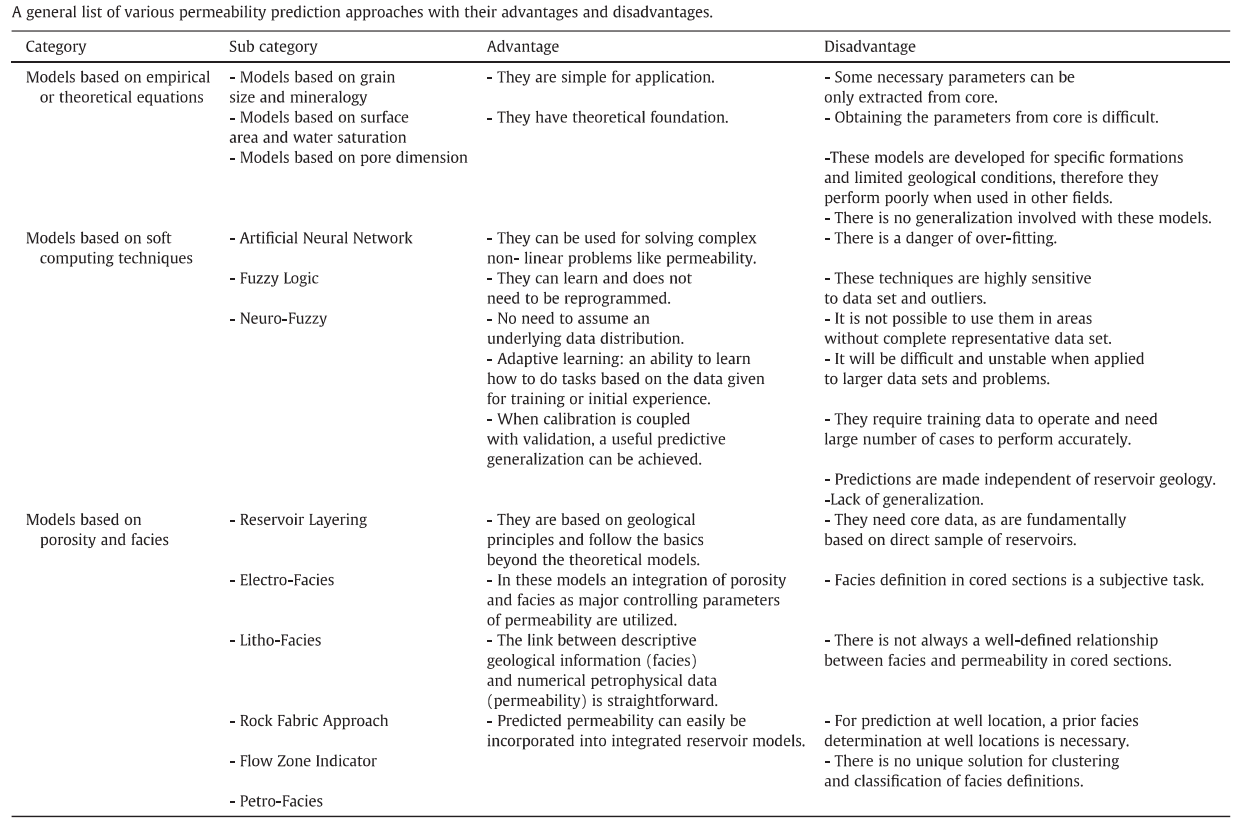

# Step 1: Plotting the Cross Plot of Porosity vs. Permeability

  We can use simple linear plots and logarithmic plots to understand the relationship between porosity and permeability.

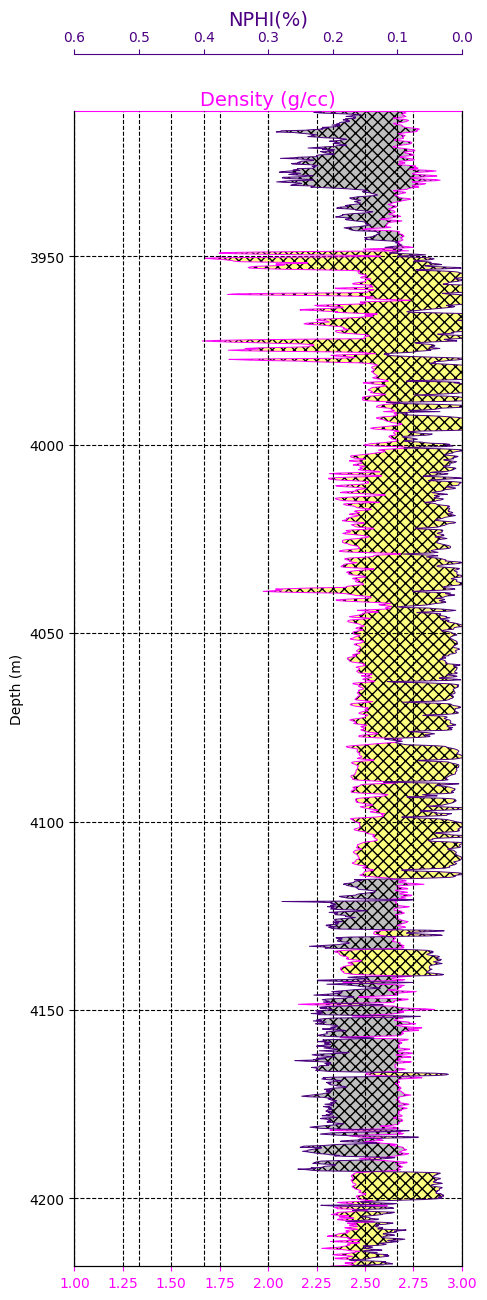

In [46]:
#limit of the RHOB
rho1=1
rho2=3
#limit of the NPHI 
nph1=0
nph2=0.6

fig = plt.figure(figsize=(5, 15))
ax8 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)
condition=df3uv.RHOB<rho2 - df3uv['TNPH']*((rho2-rho1)/(nph2-nph1))
condition_shale=df3uv.RHOB>rho2 - df3uv['TNPH']*((rho2-rho1)/(nph2-nph1))
ax8.plot(df3uv.RHOB, df3uv.DEPTH, lw=0.7, color='magenta')
ax8.fill_betweenx(df3uv.DEPTH, rho2 - df3uv['TNPH']*((rho2-rho1)/(nph2-nph1)), df3uv.RHOB,where=condition,facecolor='yellow',hatch='xxx',alpha=0.5)
ax8.fill_betweenx(df3uv.DEPTH, rho2 - df3uv['TNPH']*((rho2-rho1)/(nph2-nph1)), df3uv.RHOB,where=condition_shale,facecolor='grey',hatch='xxx',alpha=0.5)
ax8.set_ylabel('Depth (m)')
ax8.set_xlim(rho1, rho2)
ax8.set_ylim(max_value, min_value)  # Reversed the y-axis limits
ax8.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)
ax8.tick_params(axis='x', colors='magenta')
ax8.spines['top'].set_edgecolor('magenta')
ax8.spines['top'].set_position(("axes", 1.0))
ax8.xaxis.set_ticks_position('top')
ax8.set_xlabel('Density (g/cc)', color='magenta', fontsize=14)
ax8.xaxis.set_label_position('top')
ax8.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)

ax81 = ax8.twiny()
ax81.plot(df3uv.TNPH, df3uv.DEPTH, lw=0.7, color='indigo')
ax81.set_ylabel('Depth (m)')
ax81.set_xlim(nph2, nph1)
ax81.set_ylim(max_value, min_value)  # Reversed the y-axis limits
ax81.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)
ax81.tick_params(axis='x', colors='indigo')
ax81.spines['top'].set_edgecolor('indigo')
ax81.spines['top'].set_position(("axes", 1.05))
ax81.xaxis.set_ticks_position('top')
ax81.set_xlabel('NPHI(%)', color='indigo', fontsize=14)
ax81.xaxis.set_label_position('top')
ax81.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)

plt.show()


# (A)  Uncorrected properties calculation

In [47]:
#Appying the matrix correction for the nuetron for the sandstone 
df3uv['TNPH'] = df3uv['TNPH']-0.04
NPHI_sandstone=df3uv['TNPH']


#Density porosity caclulation without applying any kind of the correction
DPHI_sandstone_nc=(2.6-(df3uv['RHOB'])) /(2.6-Pfl)
df3uv['DPHI_sandstone_nc']=DPHI_sandstone_nc


#total porosity calculation without correcting for the matrix and Gas zone 

TPHI_nc = (NPHI_sandstone+DPHI_sandstone_nc)/2
df3uv['TPHI_nc']=TPHI_nc


# (B) Corrected properties calculation (calibration)

## 1. Density Porosity calculation

In [48]:
#Applying the matrix correction for the denisty porosity calibration 

import numpy as np

depth_boundary = np.array([3911.5,3948,3990,4002,4113,4133,4142,4193,4200,4218])
num_of_form = len(depth_boundary)

print('Number of lithology separated:', num_of_form)

pma_array = np.zeros(len(df3uv))
RHOMA = []  # Define the RHOMA list

for i in range(num_of_form):
    rhoshale = 2.71
    rhosand = 2.67
    if i % 2 == 1:
        RHOMA.append(rhosand)
    else:
        RHOMA.append(rhoshale)

print(RHOMA)

for i in range(num_of_form - 1):  # Adjust the loop range to avoid IndexError
    condition_boundary = (df3uv['DEPTH'] >= depth_boundary[i]) & (df3uv['DEPTH'] <= depth_boundary[i + 1])
    pma_array[condition_boundary] = RHOMA[i]

# Matrix corrected density porosity calculation 

Pfl=1       #fluid density
DPHI_mcor=(pma_array-(df3uv['RHOB'])) /(pma_array-Pfl)
df3uv['DPHI_mcor']=DPHI_mcor
    
# Gas corrected density porosity calculation
DPHI_mcor_gc = []  # Initialize the DPHI_mcor_gr list

for i in range(len(df3uv['DEPTH'])):
    if (3911.5 <= df3uv['DEPTH'].iloc[i] <= 3940) or (4112 <= df3uv['DEPTH'].iloc[i] <= 4134) or (4140 <= df3uv['DEPTH'].iloc[i] <= 4193) or (4200 <= df3uv['DEPTH'].iloc[i] <= 4218):
        # Inside the gas region, do nothing with 'DPHI_mcor'
        DPHI_mcor_gc.append(df3uv['DPHI_mcor'].iloc[i])
    else:
        # For gas-bearing zone, adjust 'DPHI_mcor'
        DPHI_mcor_gc.append(0.8 * df3uv['DPHI_mcor'].iloc[i])

# Assign the corrected values back to the DataFrame
df3uv['DPHI_mcor_gc'] = DPHI_mcor_gc



Number of lithology separated: 10
[2.71, 2.67, 2.71, 2.67, 2.71, 2.67, 2.71, 2.67, 2.71, 2.67]


## 2. Nuetron porosity calculation

In [49]:
##already corrected with matrix else other calibration is not possible 

## 3. Total porosity calculation 

In [50]:
'''Total Porosity calculation'''

TPHI_corr=[]
    
#Correcting TPHI for gas regions by considering rms of NPHI and DPHI ,else the average only
for i in range(len(df3uv['DEPTH'])):
    if (3911.5 <= df3uv['DEPTH'].iloc[i] <= 3940) or (4112 <= df3uv['DEPTH'].iloc[i] <= 4134) or (4140 <= df3uv['DEPTH'].iloc[i] <= 4193) or (4200 <= df3uv['DEPTH'].iloc[i] <= 4218):
        TPHI_corr.append((df3uv['TNPH'].iloc[i]+df3uv['DPHI_mcor_gc'].iloc[i])/2)     
    else:
        TPHI_corr.append(((df3uv['TNPH'].iloc[i]**2+df3uv['DPHI_mcor_gc'].iloc[i]**2)/2)**0.5)

# Adding a new column 'TPHI' to the DataFrame
df3uv['TPHI_corr']=TPHI_corr

# (C) Effective properties calculation

# 1. shale corrected Nuetron porosity  (Effective Nuetron Porosity)

In [51]:
import numpy as np
# Age of rock = Early Cretaceous
p05 = df3uv.GR.quantile(0.05)
p95 = df3uv.GR.quantile(0.95)
Igr = (df3uv['GR'] - p05) / (p95 - p05)  # gamma ray index
# Vshc calculation
Vshc_raw = 0.083 * (2 ** (3.7 * Igr) - 1)  # Vshc calculation for young tertiary rocks
Vshc = []

for i in Vshc_raw:
    if i >= 1:
        Vshc.append(1)
    else:
        Vshc.append(i)

# Rshc calculation
x = np.percentile(Vshc, 95)
NPHIsh = []
NPHI=df3uv['TNPH']
# Define a tolerance value
tol_val = 1  # Adjust this value as needed

for i in range(len(Vshc)):
    
        if Vshc[i]>=x and abs(df3uv.BS.iloc[i] - df3uv.CALI.iloc[i]) < tol_val:
            NPHIsh.append(NPHI.iloc[i])

NPHIsh=np.array(NPHIsh)   
NPHIsh_mean=NPHIsh.mean()      
print(NPHIsh_mean) 

Vshc=np.array(Vshc)
#Nphi_correction=Vshc*NPHIshc_mean
NPHI_eff=df3uv['TNPH']-Vshc*NPHIsh_mean
df3uv['NPHI_eff']=NPHI_eff

0.15775526315789473


# 2. shale corrected Density porosity  (Effective Density Porosity)

In [52]:
import numpy as np

# Age of rock = Early Cretaceous
p05 = df3uv.GR.quantile(0.05)
p95 = df3uv.GR.quantile(0.95)
Igr = (df3uv['GR'] - p05) / (p95 - p05)  # gamma ray index

# Vshc calculation
Vshc_raw = 0.083 * (2 ** (3.7 * Igr) - 1)  # Vshc calculation for young tertiary rocks

Vshc = []

for i in Vshc_raw:
    if i >= 1:
        Vshc.append(1)
    else:
        Vshc.append(i)

x = np.percentile(Vshc, 95)
DPHIsh = []

# Define a tolerance value
tol_val = 1  # Adjust this value as needed

for i in range(len(Vshc)):
    if Vshc[i] >= x and abs(df3uv.BS.iloc[i] - df3uv.CALI.iloc[i]) < tol_val:
        DPHIsh.append(df3uv['DPHI_mcor_gc'].iloc[i])

DPHIsh = np.array(DPHIsh)
DPHIsh_mean = DPHIsh.mean()

# Assuming DPHIsh_mean is defined earlier in your script
DPHI_mcor_gc = np.array(DPHI_mcor_gc)
Vshc = np.array(Vshc)
DPHI_eff = df3uv['DPHI_mcor_gc'] - Vshc * DPHIsh_mean

df3uv['DPHI_eff']=DPHI_eff

# 2. shale corrected Total  porosity  (Effective Total Porosity)

In [53]:
import numpy as np

# Age of rock = Early Cretaceous
p05 = df3uv.GR.quantile(0.05)
p95 = df3uv.GR.quantile(0.95)
Igr = (df3uv['GR'] - p05) / (p95 - p05)  # gamma ray index

# Vshc calculation
Vshc_raw = 0.083 * (2 ** (3.7 * Igr) - 1)  # Vshc calculation for young tertiary rocks

Vshc = []

for i in Vshc_raw:
    if i >= 1:
        Vshc.append(1)
    else:
        Vshc.append(i)
df3uv['Vsh']=Vshc

x = np.percentile(Vshc, 95)
TPHIsh = []

# Define a tolerance value
tol_val = 1  # Adjust this value as needed

for i in range(len(Vshc)):
    if Vshc[i] >= x and abs(df3uv.BS.iloc[i] - df3uv.CALI.iloc[i]) < tol_val:
        TPHIsh.append(df3uv['TPHI_corr'].iloc[i])

TPHIsh = np.array(DPHIsh)
TPHIsh_mean = TPHIsh.mean()

Vshc = np.array(Vshc)
TPHI_eff = df3uv['TPHI_corr'] - Vshc * DPHIsh_mean

df3uv['TPHI_eff']=TPHI_eff

# (D) Water saturation calculation 

In [54]:
Rw=0.12
a=1      # Turtosity factor
m=1.8    # for shaly sands,cementation factor=1.7-1.8
n=2      # n = saturation exponent, which varies from 1.8 to 4.0 but normally is 2.0


# Sw_Archie

In [55]:
Sw_ar=(a*Rw/((df3uv['TPHI_corr']**m)*df3uv['RESD']))**(1/n)

# Set values of Sw to 1 where Sw is greater than or equal to 1

Sw_ar.clip(0,1)

Sw_ar[Sw_ar>=1]=1
# Adding a new column Sw_ar to original dataframe
df3uv['Sw_ar']=Sw_ar

# Sw Calculation (Simandoux Equation)

### Rsh calculation 

In [56]:
'''Rshc calculation'''
x=np.percentile(Vshc, 95)
Rshc=[]
Dshc=[]
for i in range(len(Vshc)):  
    if df3uv['Vsh'].iloc[i] >= x and abs(df3uv.BS.iloc[i] - df3uv.CALI.iloc[i]) < tol_val:
        Rshc.append(df3uv['RESD'].iloc[i])
        Dshc.append(df3uv['DEPTH'].iloc[i])

Rshc=np.array(Rshc)   
Rshc_mean=Rshc.mean()      
print(Rshc_mean)


5.825395789473687


In [57]:
a=float(1)
Rw=float(0.12)
Rsh_mean=Rshc_mean
PHI=df3uv['TPHI_corr']
Vshc=df3uv['Vsh']
Rt=df3uv['RESD']
m=float(1.8)
Sw_sd = ((a * Rw) / (2 * PHI **m)) * (np.sqrt((Vshc / Rsh_mean)**2 + ((4 * PHI ** m) / (a * Rw * Rt))) - (Vshc / Rsh_mean))
Sw_sd = np.array(Sw_sd)
#Sw_sd.clip(0,1)

Sw_sd[Sw_sd>=1]=1
df3uv['Sw_sd']=Sw_sd
df3uv['Sw_sd'] =df3uv['Sw_sd'].interpolate(method='linear', limit_direction='both')

In [5]:
'''Load the core data from the Excel file'''
core = pd.read_excel(r"C:\Users\Ritesh\Downloads\case study\core_dep_por_perm_CLEANED.xlsx")

# Select required column names as a list
selected_columns= ['Top depth (m)', 'Porosity (%)', 'Permeability (mD)']
core_data = core[selected_columns]
print(core_data)

# filtering the data based on the depth range of the Upper Vulcan formation 
core_data = core_data[(core_data['Top depth (m)'] >= 3911.5) & (core_data['Top depth (m)'] <= 4218)]

# convert the porosity from value to percentage
core_data['Porosity (%)'] = core_data['Porosity (%)']*0.01

# Plots

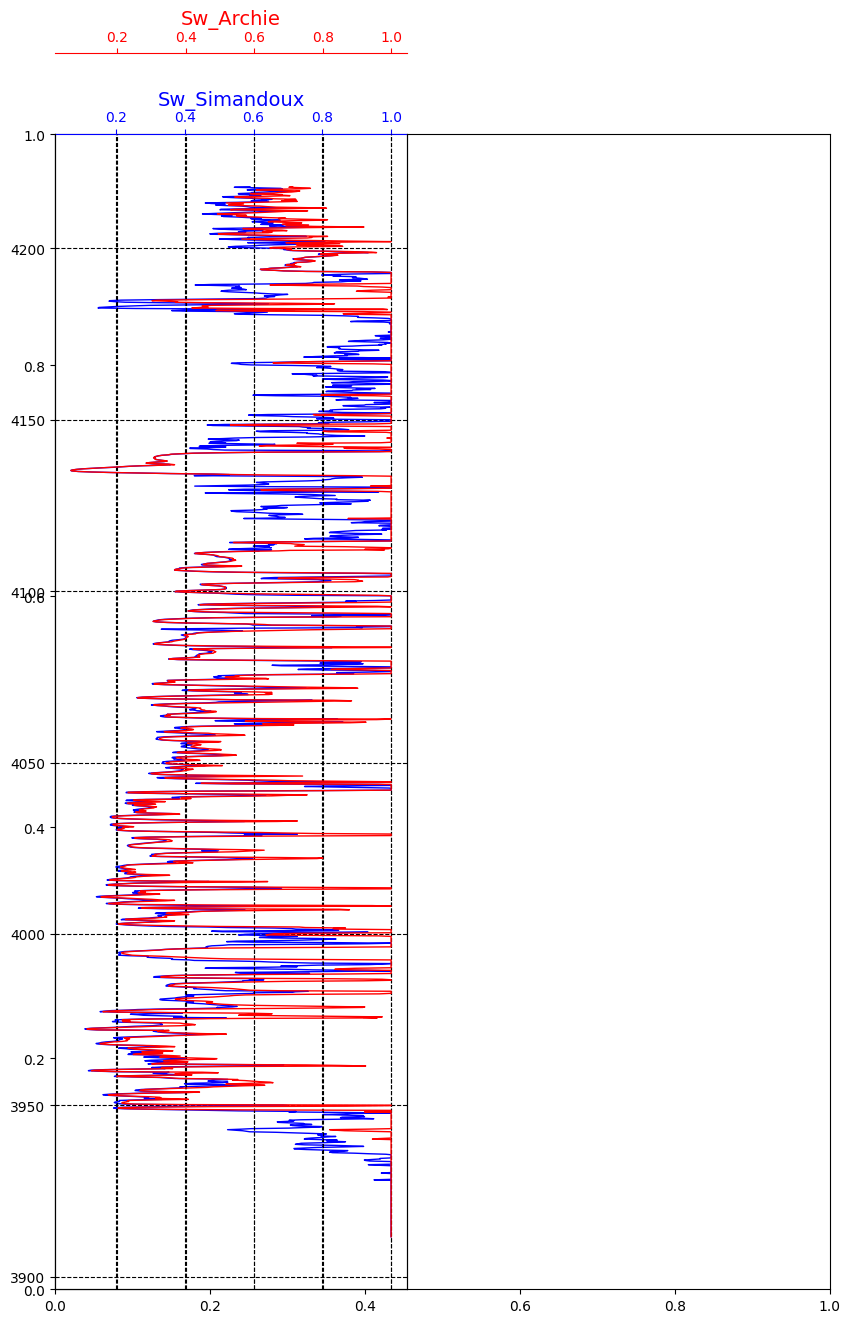

In [62]:
'''Plot'''
fig,axes=plt.subplots(figsize=(10,15))
#set up plot axes
ax1=plt.subplot2grid((1,2) , (0,0) ,rowspan=1 , colspan=1)
#ax2=plt.subplot2grid((1,2) , (0,1) ,rowspan=1 , colspan=1)
ax11=ax1.twiny()
# Set up the log tracks
ax1.plot(Sw_sd, df3uv['DEPTH'], color='b', lw=1)
ax1.invert_yaxis()
ax1.tick_params(axis='x', colors='b')
ax1.spines['top'].set_edgecolor('b')
ax11.spines['top'].set_position(("axes",1.0))
ax1.xaxis.set_ticks_position('top')
ax1.set_xlabel('Sw_Simandoux', color='b', fontsize=14)
ax1.xaxis.set_label_position('top')
ax1.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)


ax11.plot(Sw_ar, df3uv['DEPTH'], color='r', lw=1)
ax11.invert_yaxis()
ax11.tick_params(axis='x', colors='r')
ax11.spines['top'].set_edgecolor('r')
ax11.spines['top'].set_position(("axes", 1.07))
ax11.xaxis.set_ticks_position('top')
ax11.set_xlabel('Sw_Archie', color='r', fontsize=14)
ax11.xaxis.set_label_position('top')
ax11.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)


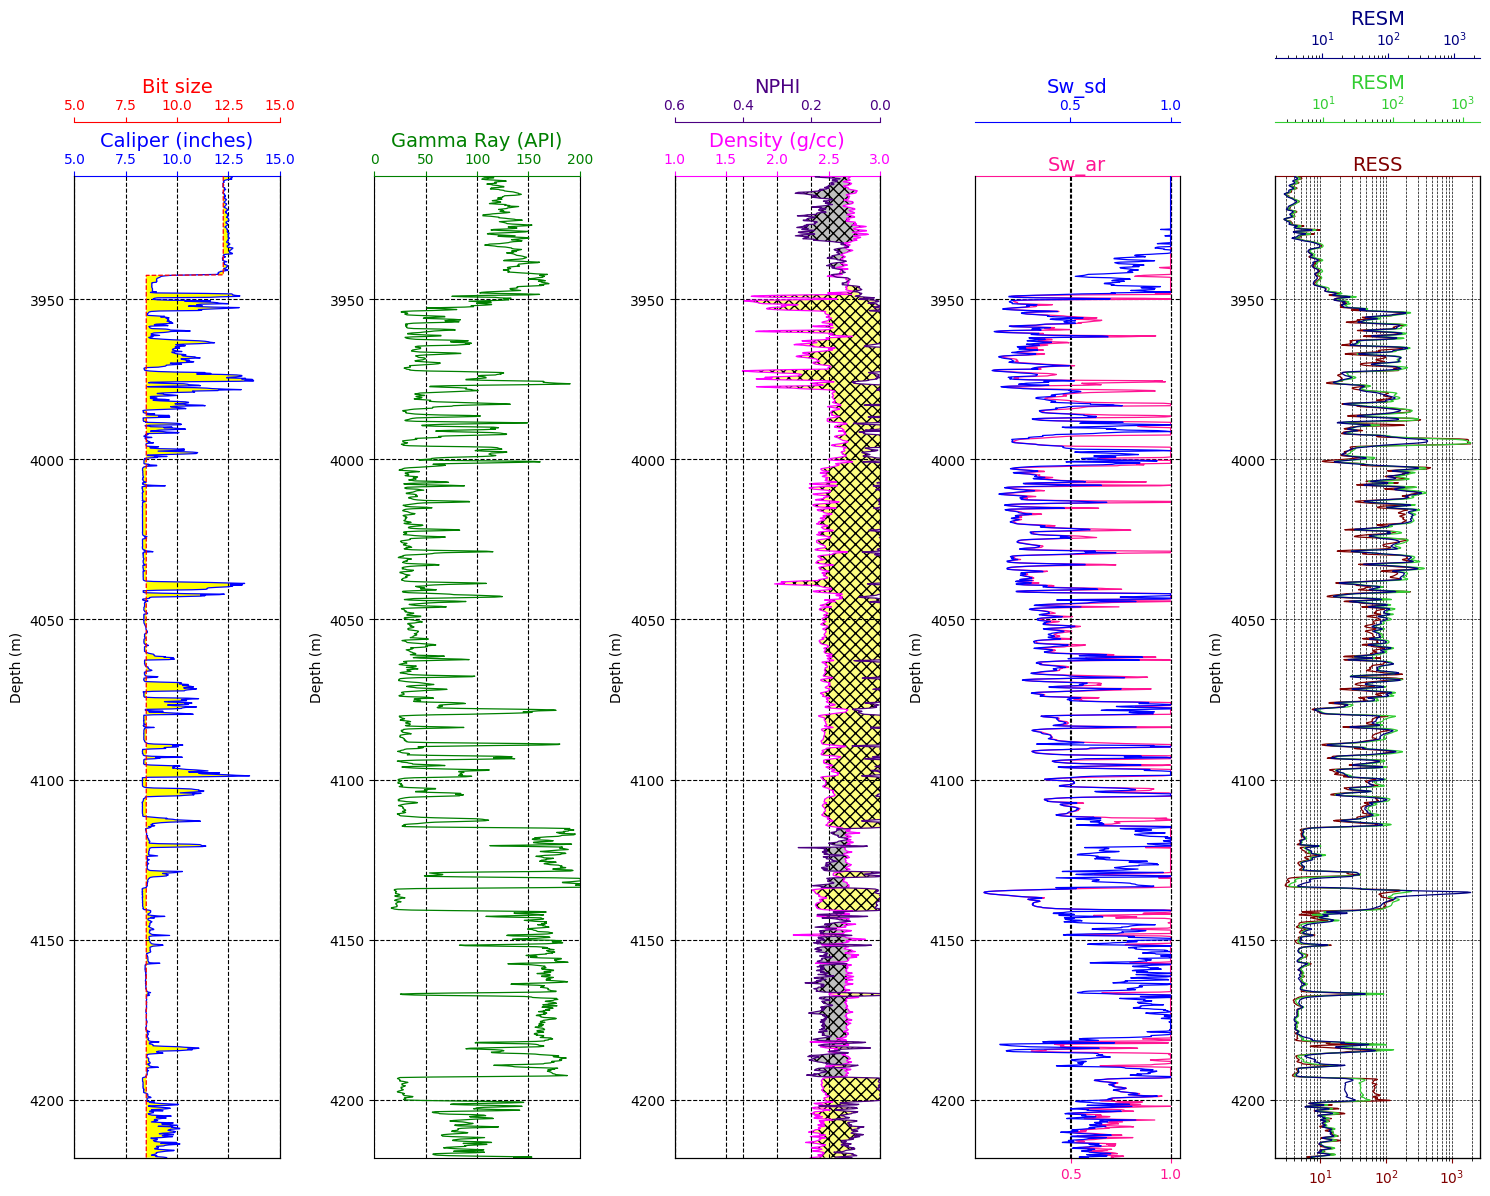

In [63]:
fig = plt.figure(figsize=(15, 12))
ax1 = plt.subplot2grid((1, 5), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 5), (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 5), (0, 2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1, 5), (0, 3), rowspan=1, colspan=1)
ax5 = plt.subplot2grid((1, 5), (0, 4), rowspan=1, colspan=1)

ax1.plot(df3uv.CALI, df3uv.DEPTH, lw=0.9, color='blue')
ax1.fill_betweenx(df3uv.DEPTH, df3uv.BS, df3uv.CALI, facecolor='yellow')
ax1.set_xlabel('Caliper (inches)',color='b', fontsize=14)
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(max_value, min_value) # Reversed the y-axis limits
ax1.set_xlim(5,15)
ax1.tick_params(axis='x', colors='b')
ax1.spines['top'].set_edgecolor('b')
ax1.xaxis.set_label_position('top')
ax1.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)

ax11=ax1.twiny()
ax11.plot(df3uv.BS, df3uv.DEPTH, lw=0.9, color='red', linestyle='dashed')
ax11.set_xlim(5,15)
ax11.tick_params(axis='x', colors='r')
ax11.spines['top'].set_edgecolor('r')
ax11.spines['top'].set_position(("axes", 1.055))
ax11.set_xlabel('Bit size',color='r',fontsize=14)
ax11.xaxis.set_label_position('top')
ax1.xaxis.set_ticks_position('top')




ax2.plot(df3uv.GR, df3uv.DEPTH, lw=0.9, color='green')
ax2.set_ylabel('Depth (m)')
ax2.set_xlim(0, 200)
ax2.set_ylim(max_value,min_value)  # Reversed the y-axis limits
ax2.tick_params(axis='x', colors='g')
ax2.spines['top'].set_edgecolor('g')
ax2.spines['top'].set_position(("axes", 1.0))
ax2.xaxis.set_ticks_position('top')
ax2.set_xlabel('Gamma Ray (API)',color='g', fontsize=14)
ax2.xaxis.set_label_position('top')
ax2.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)




ax3.plot(df3uv.RHOB, df3uv.DEPTH, lw=0.9, color='magenta')
ax3.set_ylabel('Depth (m)')
ax3.set_xlim(1, 3)
ax3.set_ylim(max_value,min_value)  # Reversed the y-axis limits
ax3.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
ax3.tick_params(axis='x', colors='magenta')
ax3.spines['top'].set_edgecolor('magenta')
ax3.spines['top'].set_position(("axes", 1.0))
ax3.xaxis.set_ticks_position('top')
ax3.set_xlabel('Density (g/cc)',color='magenta', fontsize=14)
ax3.xaxis.set_label_position('top')
ax3.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)

ax31 = ax3.twiny()
ax31.plot(df3uv.TNPH, df3uv.DEPTH, lw=0.9, color='indigo')
ax31.set_ylabel('Depth (m)')
ax31.set_xlim(0.6, 0)
ax31.set_ylim(max_value,min_value)  # Reversed the y-axis limits
ax31.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
ax31.tick_params(axis='x', colors='indigo')
ax31.spines['top'].set_edgecolor('indigo')
ax31.spines['top'].set_position(("axes", 1.055))
ax31.xaxis.set_ticks_position('top')
ax31.set_xlabel('NPHI',color='indigo', fontsize=14)
ax31.xaxis.set_label_position('top')
ax31.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
ax3.xaxis.set_ticks_position('top')

condition=df3uv.RHOB<rho2 - df3uv['TNPH']*((rho2-rho1)/(nph2-nph1))
condition_shale=df3uv.RHOB>rho2 - df3uv['TNPH']*((rho2-rho1)/(nph2-nph1))
ax3.fill_betweenx(df3uv.DEPTH, rho2 - df3uv['TNPH']*((rho2-rho1)/(nph2-nph1)), df3uv.RHOB,where=condition,facecolor='yellow',hatch='xxx',alpha=0.5)
ax3.fill_betweenx(df3uv.DEPTH, rho2 - df3uv['TNPH']*((rho2-rho1)/(nph2-nph1)), df3uv.RHOB,where=condition_shale,facecolor='grey',hatch='xxx',alpha=0.5)
ax3.set_ylabel('Depth (m)')
        
ax4.plot(Sw_ar, df3uv.DEPTH, lw=0.9, color='deeppink')
ax4.set_ylabel('Depth (m)')
ax4.set_ylim(max_value,min_value)  # Reversed the y-axis limits
ax4.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
ax4.tick_params(axis='x', colors='deeppink')
ax4.spines['top'].set_edgecolor('deeppink')
ax4.spines['top'].set_position(("axes", 1.0))
ax4.xaxis.set_ticks_position('top')
ax4.set_xlabel('Sw_ar',color='deeppink', fontsize=14)
ax4.xaxis.set_label_position('top')
ax4.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)

ax41=ax4.twiny()
ax41.plot(Sw_sd, df3uv.DEPTH, lw=0.9, color='b')
ax41.set_ylabel('Depth (m)')
ax41.set_ylim(max_value,min_value)  # Reversed the y-axis limits
ax41.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
ax41.tick_params(axis='x', colors='b')
ax41.spines['top'].set_edgecolor('b')
ax41.spines['top'].set_position(("axes", 1.055))
ax41.xaxis.set_ticks_position('top')
ax41.set_xlabel('Sw_sd',color='b', fontsize=14)
ax41.xaxis.set_label_position('top')
ax41.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)


ax5.plot(df3uv.RESS, df3uv.DEPTH, lw=0.9, color='maroon')
ax5.set_ylabel('Depth (m)')
ax5.semilogx()
ax5.set_ylim(max_value,min_value)  # Reversed the y-axis limits
ax5.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
ax5.tick_params(axis='x', colors='maroon')
ax5.spines['top'].set_edgecolor('maroon')
ax5.spines['top'].set_position(("axes", 1.0))
ax5.xaxis.set_ticks_position('top')
ax5.set_xlabel('RESS',color='maroon', fontsize=14)
ax5.xaxis.set_label_position('top')
ax5.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.5)


ax51 = ax5.twiny()
ax51.plot(df3uv.RESM, df3uv.DEPTH, lw=0.9, color='limegreen')
ax51.set_ylabel('Depth (m)')
ax51.semilogx()
ax51.set_ylim(max_value,min_value)  # Reversed the y-axis limits
ax51.tick_params(axis='x', colors='limegreen')
ax51.spines['top'].set_edgecolor('limegreen')
ax51.spines['top'].set_position(("axes", 1.055))
ax51.xaxis.set_ticks_position('top')
ax51.set_xlabel('RESM',color='limegreen', fontsize=14)
ax51.xaxis.set_label_position('top')

ax52 = ax5.twiny()
ax52.plot(df3uv.RESD, df3uv.DEPTH, lw=0.9, color='navy')
ax52.set_ylabel('Depth (m)')
ax52.semilogx()
ax52.set_ylim(max_value,min_value)  # Reversed the y-axis limits
ax52.tick_params(axis='x', colors='navy')
ax52.spines['top'].set_edgecolor('navy')
ax52.spines['top'].set_position(("axes", 1.12))
ax52.xaxis.set_ticks_position('top')
ax52.set_xlabel('RESM',color='navy', fontsize=14)
ax52.xaxis.set_label_position('top')
ax52.xaxis.set_ticks_position('top')


plt.tight_layout()

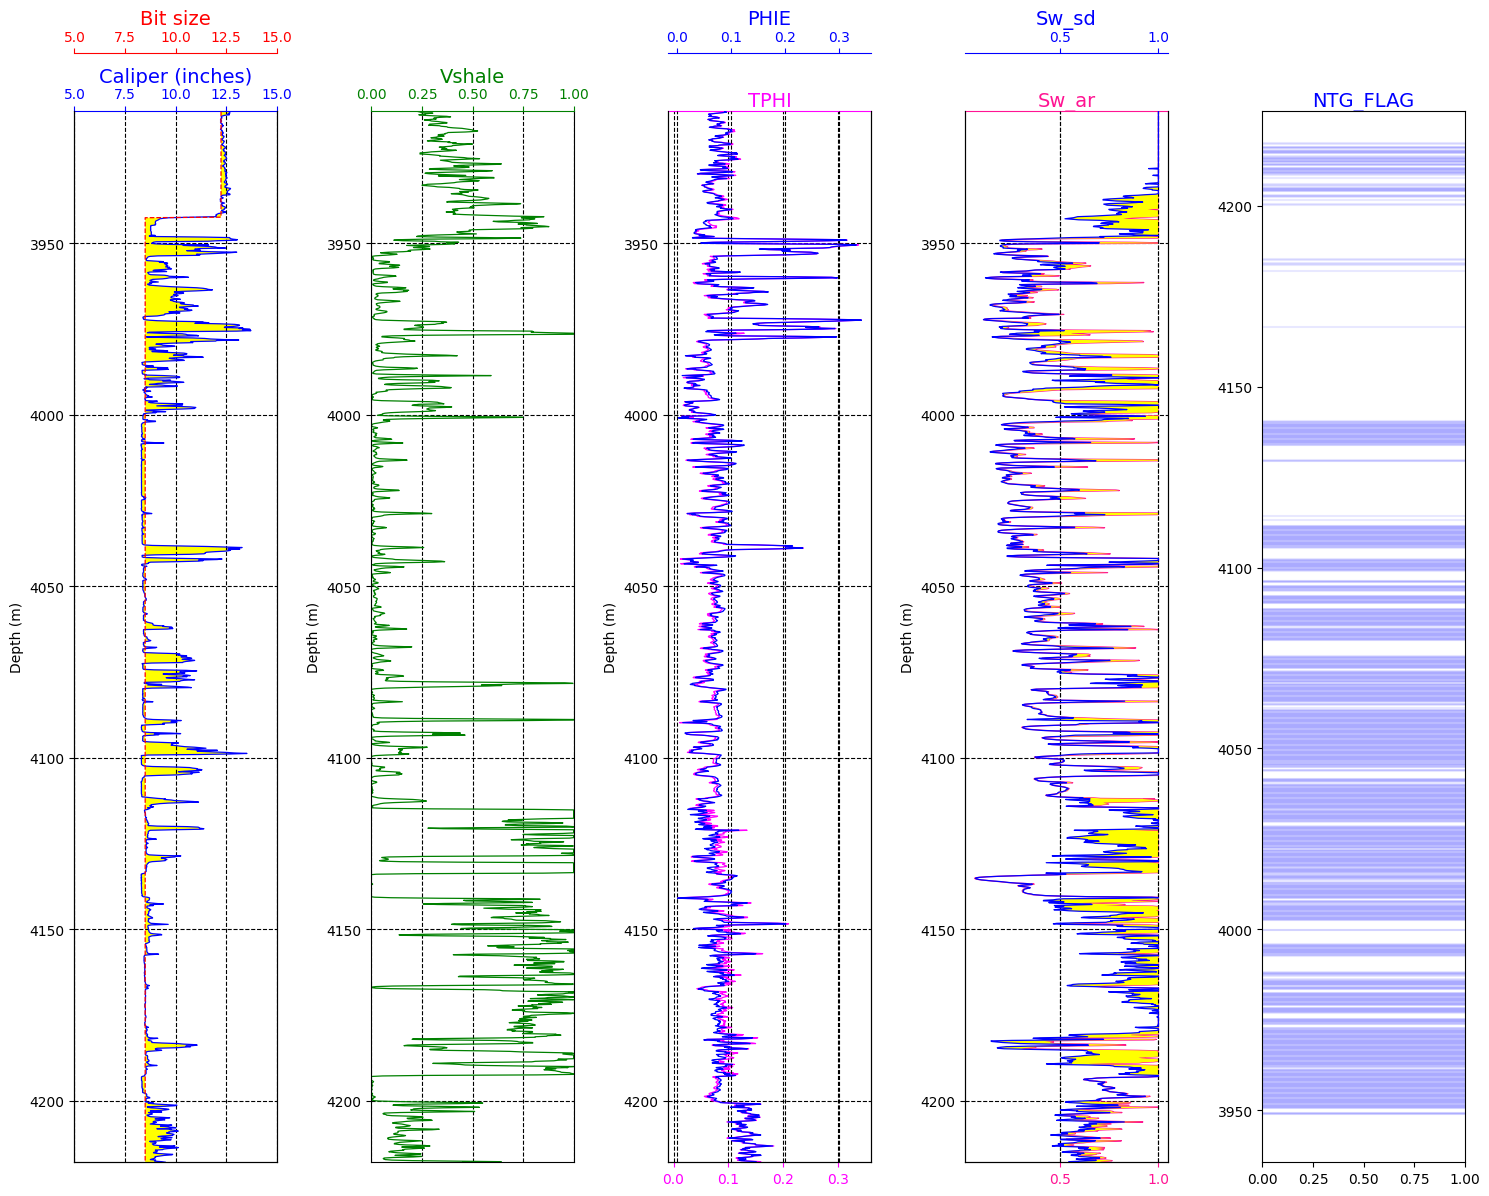

In [65]:
fig = plt.figure(figsize=(15, 12))
ax1 = plt.subplot2grid((1, 5), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 5), (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 5), (0, 2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1, 5), (0, 3), rowspan=1, colspan=1)
ax5 = plt.subplot2grid((1, 5), (0, 4), rowspan=1, colspan=1)

ax1.plot(df3uv.CALI, df3uv.DEPTH, lw=0.9, color='blue')
ax1.fill_betweenx(df3uv.DEPTH, df3uv.BS, df3uv.CALI, facecolor='yellow')
ax1.set_xlabel('Caliper (inches)',color='b', fontsize=14)
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(max_value, min_value) # Reversed the y-axis limits
ax1.set_xlim(5,15)
ax1.tick_params(axis='x', colors='b')
ax1.spines['top'].set_edgecolor('b')
ax1.xaxis.set_label_position('top')
ax1.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)

ax11=ax1.twiny()
ax11.plot(df3uv.BS, df3uv.DEPTH, lw=0.9, color='red', linestyle='dashed')
ax11.set_xlim(5,15)
ax11.tick_params(axis='x', colors='r')
ax11.spines['top'].set_edgecolor('r')
ax11.spines['top'].set_position(("axes", 1.055))
ax11.set_xlabel('Bit size',color='r',fontsize=14)
ax11.xaxis.set_label_position('top')
ax1.xaxis.set_ticks_position('top')




ax2.plot(df3uv['Vsh'], df3uv.DEPTH, lw=0.9, color='green')
ax2.set_ylabel('Depth (m)')
ax2.set_xlim(0, 1)
ax2.set_ylim(max_value,min_value)  # Reversed the y-axis limits
ax2.tick_params(axis='x', colors='g')
ax2.spines['top'].set_edgecolor('g')
ax2.spines['top'].set_position(("axes", 1.0))
ax2.xaxis.set_ticks_position('top')
ax2.set_xlabel('Vshale',color='g', fontsize=14)
ax2.xaxis.set_label_position('top')
ax2.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)




ax3.plot(df3uv['TPHI_corr'], df3uv.DEPTH, lw=0.9, color='magenta')
ax3.set_ylabel('Depth (m)')
ax3.set_ylim(max_value,min_value)  # Reversed the y-axis limits
ax3.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
ax3.tick_params(axis='x', colors='magenta')
ax3.spines['top'].set_edgecolor('magenta')
ax3.spines['top'].set_position(("axes", 1.0))
ax3.xaxis.set_ticks_position('top')
ax3.set_xlabel('TPHI',color='magenta', fontsize=14)
ax3.xaxis.set_label_position('top')
ax3.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)


ax31=ax3.twiny()
ax31.plot(df3uv['TPHI_eff'], df3uv.DEPTH, lw=0.9, color='b')
ax31.set_ylabel('Depth (m)')
ax31.set_ylim(max_value,min_value)  # Reversed the y-axis limits
ax31.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
ax31.tick_params(axis='x', colors='b')
ax31.spines['top'].set_edgecolor('b')
ax31.spines['top'].set_position(("axes", 1.055))
ax31.xaxis.set_ticks_position('top')
ax31.set_xlabel('PHIE',color='b', fontsize=14)
ax31.xaxis.set_label_position('top')
ax31.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
#ax41.set_xlim(1,0) 

        
ax4.plot(Sw_ar, df3uv.DEPTH, lw=0.9, color='deeppink')
ax4.set_ylabel('Depth (m)')
ax4.set_ylim(max_value,min_value)  # Reversed the y-axis limits
ax4.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
ax4.tick_params(axis='x', colors='deeppink')
ax4.spines['top'].set_edgecolor('deeppink')
ax4.spines['top'].set_position(("axes", 1.0))
ax4.xaxis.set_ticks_position('top')
ax4.set_xlabel('Sw_ar',color='deeppink', fontsize=14)
ax4.xaxis.set_label_position('top')
ax4.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)

ax41=ax4.twiny()
ax41.plot(Sw_sd, df3uv.DEPTH, lw=0.9, color='b')
ax41.fill_betweenx(df3uv.DEPTH,Sw_sd,Sw_ar, facecolor='yellow')
ax41.set_ylabel('Depth (m)')
ax41.set_ylim(max_value,min_value)  # Reversed the y-axis limits
ax41.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
ax41.tick_params(axis='x', colors='b')
ax41.spines['top'].set_edgecolor('b')
ax41.spines['top'].set_position(("axes", 1.055))
ax41.xaxis.set_ticks_position('top')
ax41.set_xlabel('Sw_sd',color='b', fontsize=14)
ax41.xaxis.set_label_position('top')
ax41.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
#ax41.set_xlim(1,0) 

import numpy as np

condition_ntg = (df3uv['Vsh'] <= 0.3) & (np.array(Sw_sd) <= 0.6) & (np.array(TPHI) >= 0.05)
npayz=[]
for depth, is_condition_met in zip(df3uv['DEPTH'], condition_ntg):
    if is_condition_met:
        ax5.axhline(y=depth, color='b', alpha=0.09)
        npayz.append(1)
    else:
        npayz.append(0)
ax5.set_xlabel('NTG_FLAG',color='b', fontsize=14)
ax5.xaxis.set_label_position('top')

plt.tight_layout()

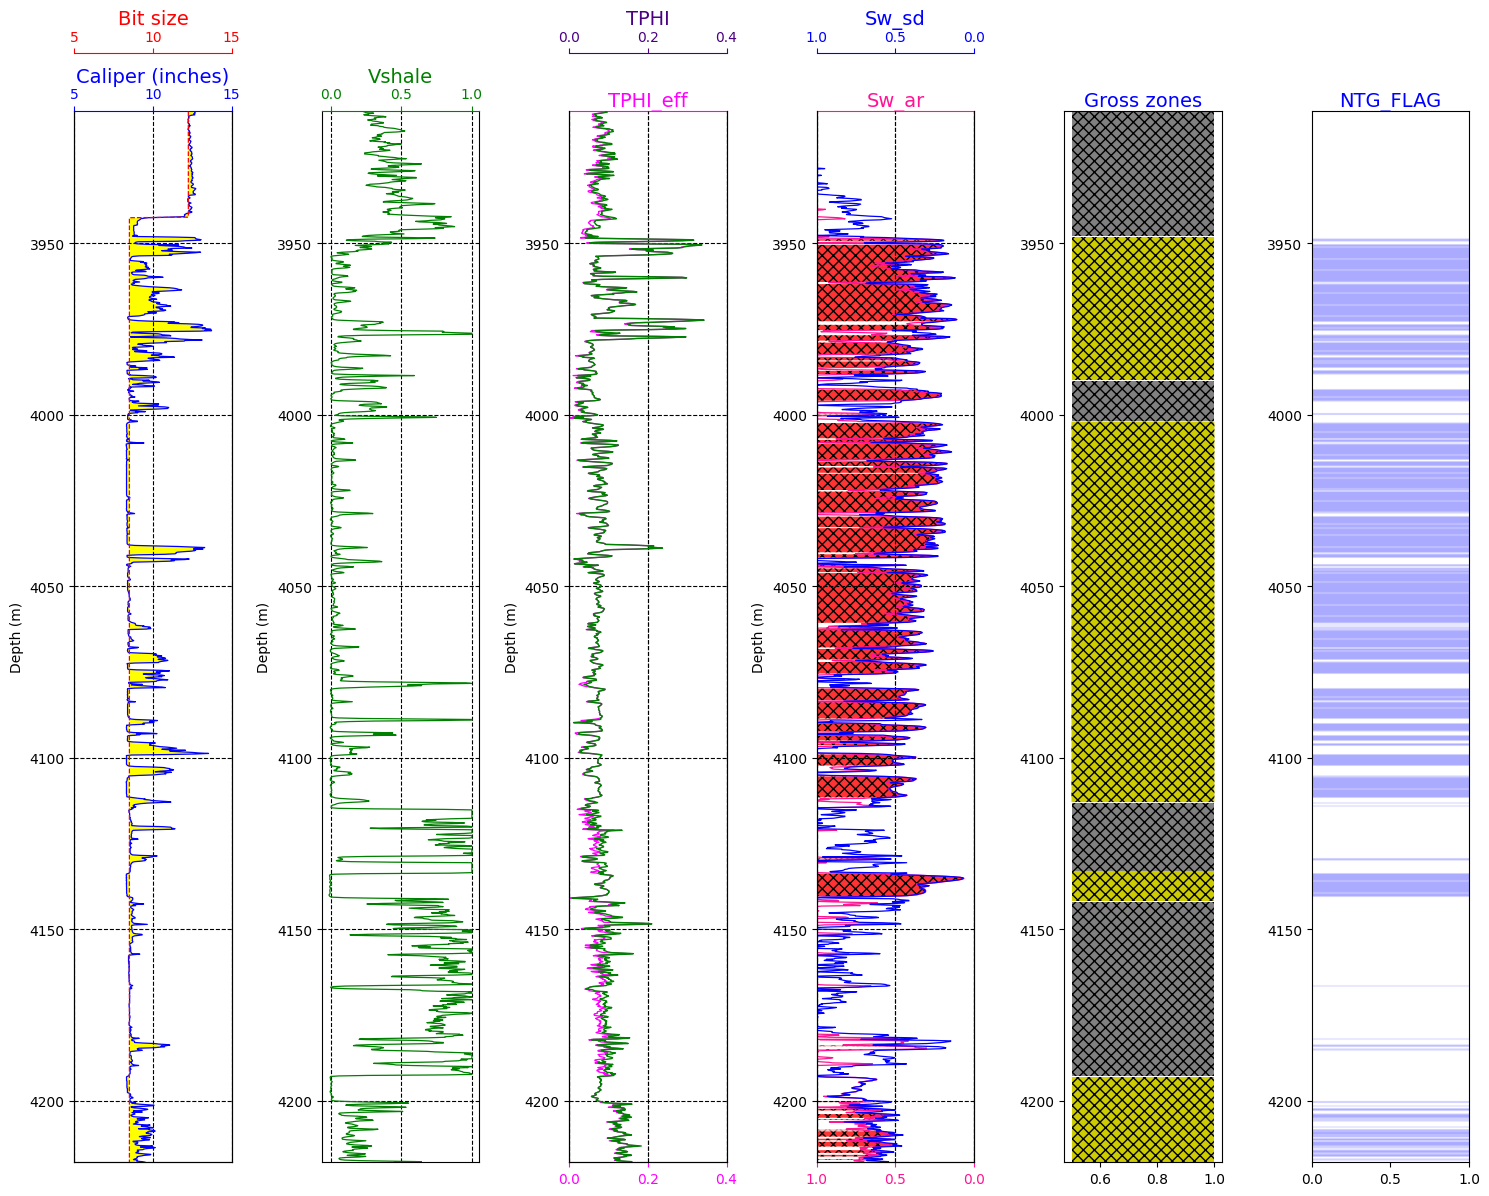

In [67]:
fig = plt.figure(figsize=(15, 12))
ax1 = plt.subplot2grid((1, 6), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 6), (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 6), (0, 2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1, 6), (0, 3), rowspan=1, colspan=1)
ax5 = plt.subplot2grid((1, 6), (0, 4), rowspan=1, colspan=1)
ax6 = plt.subplot2grid((1, 6), (0, 5), rowspan=1, colspan=1)


ax1.plot(df3uv.CALI, df3uv.DEPTH, lw=0.9, color='blue')
ax1.fill_betweenx(df3uv.DEPTH, df3uv.BS, df3uv.CALI, facecolor='yellow')
ax1.set_xlabel('Caliper (inches)',color='b', fontsize=14)
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(max_value, min_value) # Reversed the y-axis limits
ax1.set_xlim(5,15)
ax1.tick_params(axis='x', colors='b')
ax1.spines['top'].set_edgecolor('b')
ax1.xaxis.set_label_position('top')
ax1.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)

ax11=ax1.twiny()
ax11.plot(df3uv.BS, df3uv.DEPTH, lw=0.9, color='red', linestyle='dashed')
ax11.set_xlim(5,15)
ax11.tick_params(axis='x', colors='r')
ax11.spines['top'].set_edgecolor('r')
ax11.spines['top'].set_position(("axes", 1.055))
ax11.set_xlabel('Bit size',color='r',fontsize=14)
ax11.xaxis.set_label_position('top')
ax1.xaxis.set_ticks_position('top')




ax2.plot(df3uv['Vsh'], df3uv.DEPTH, lw=0.9, color='green')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(max_value,min_value)  # Reversed the y-axis limits
ax2.tick_params(axis='x', colors='g')
ax2.spines['top'].set_edgecolor('g')
ax2.spines['top'].set_position(("axes", 1.0))
ax2.xaxis.set_ticks_position('top')
ax2.set_xlabel('Vshale',color='g', fontsize=14)
ax2.xaxis.set_label_position('top')
ax2.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)




ax3.plot(df3uv['TPHI_eff'], df3uv['DEPTH'], lw=0.9, color='magenta')
ax3.set_ylabel('Depth (m)')
ax3.set_xlim(0, 0.4)
ax3.set_ylim(max_value,min_value)  # Reversed the y-axis limits
ax3.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
ax3.tick_params(axis='x', colors='magenta')
ax3.spines['top'].set_edgecolor('magenta')
ax3.spines['top'].set_position(("axes", 1.0))
ax3.xaxis.set_ticks_position('top')
ax3.set_xlabel('TPHI_eff',color='magenta', fontsize=14)
ax3.xaxis.set_label_position('top')
ax3.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)

ax31=ax3.twiny()

ax31.plot(df3uv['TPHI_corr'], df3uv.DEPTH, color='g', lw=1)
ax31.set_ylabel('Depth (m)')
ax31.set_xlim(0, 0.4)
ax31.set_ylim(max_value,min_value)  # Reversed the y-axis limits
ax31.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
ax31.tick_params(axis='x', colors='indigo')
ax31.spines['top'].set_edgecolor('indigo')
ax31.spines['top'].set_position(("axes", 1.055))
ax31.xaxis.set_ticks_position('top')
ax31.set_xlabel('TPHI',color='indigo', fontsize=14)
ax31.xaxis.set_label_position('top')
ax31.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
ax31.xaxis.set_ticks_position('top')


        
ax4.plot(Sw_ar, df3uv.DEPTH, lw=0.9, color='deeppink')
ax4.set_ylabel('Depth (m)')
ax4.set_ylim(max_value,min_value)  # Reversed the y-axis limits
ax4.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
ax4.tick_params(axis='x', colors='deeppink')
ax4.spines['top'].set_edgecolor('deeppink')
ax4.spines['top'].set_position(("axes", 1.0))
ax4.xaxis.set_ticks_position('top')
ax4.set_xlabel('Sw_ar',color='deeppink', fontsize=14)
ax4.xaxis.set_label_position('top')
ax4.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
ax4.set_xlim(1,0)

ax41=ax4.twiny()
ax41.plot(Sw_sd, df3uv.DEPTH, lw=0.9, color='b')
#ax41.fill_betweenx(df3uv.DEPTH,Sw_sd,Sw_ar, facecolor='yellow')
ax41.set_ylabel('Depth (m)')
ax41.set_ylim(max_value,min_value)  # Reversed the y-axis limits
ax41.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
ax41.tick_params(axis='x', colors='b')
ax41.spines['top'].set_edgecolor('b')
ax41.spines['top'].set_position(("axes", 1.055))
ax41.xaxis.set_ticks_position('top')
ax41.set_xlabel('Sw_sd',color='b', fontsize=14)
ax41.xaxis.set_label_position('top')
ax41.grid(which='both',color='black', axis='both', alpha=1, linestyle='--',linewidth=0.8)
ax41.set_xlim(1,0) 

import numpy as np

#condition_ntg = (df3uv['Vsh'] <= 0.3) & (np.array(Sw_sd) <= 0.6) & (np.array(TPHI) >= 0.05)
npayz=[]


import numpy as np

depth_boundary = np.array([3911.5,3948,3990,4002,4113,4133,4142,4193,4218])
num_of_form = len(depth_boundary)

for i in range(num_of_form - 1):  # Adjust the loop range to avoid IndexError
    condition_boundary = (df3uv['DEPTH'] >= depth_boundary[i]) & (df3uv['DEPTH'] <= depth_boundary[i + 1])
    if i % 2 == 1:
        ax5.fill_betweenx(df3uv.DEPTH,0.5,1,where=condition_boundary,facecolor='#CCCC00',hatch='xxx')
        
    else:
        ax5.fill_betweenx(df3uv.DEPTH,0.5,1,where=condition_boundary,facecolor='grey',hatch='xxx')
ax5.set_xlabel('Gross zones',color='b', fontsize=14)
ax5.xaxis.set_label_position('top')
ax5.set_ylim(max_value,min_value)
                
ax4.fill_betweenx(df3uv.DEPTH,Sw_sd,1,facecolor='red',hatch='xxx',alpha=0.8,where=condition_ntg)

import numpy as np

condition_ntg = (df3uv['Vsh'] <= 0.3) & (np.array(Sw_sd) <= 0.6) & (df3uv['TPHI_corr'] >= 0.05)
npayz=[]
for depth, is_condition_met in zip(df3uv['DEPTH'], condition_ntg):
    if is_condition_met:
        ax6.axhline(y=depth, color='b', alpha=0.09)
        npayz.append(1)
    else:
        npayz.append(0)
ax6.set_xlabel('NTG_FLAG',color='b', fontsize=14)
ax6.xaxis.set_label_position('top')
ax6.set_ylim(max_value,min_value)


plt.tight_layout()

In [ ]:
npayz=np.array(npayz)
print(np.sum(npayz)/len(df3uv['DEPTH']))

In [68]:
NTG2 = []
clicked_points = pd.DataFrame({'y':[3948, 3990, 4002, 4113, 4133, 4142, 4193, 4218]})
for i in range(int(len(clicked_points['y'])/2)):
    df_i = df3uv[(df3uv['DEPTH'] > clicked_points['y'].iloc[2*i]) & (df3uv['DEPTH'] < clicked_points['y'].iloc[2*i+1])]
    npayz_i = []
    condition_ntg = (df_i['Vsh'] <= 0.3) & (df_i['Sw_sd'] <= 0.6) & (df_i['TPHI_corr'] >= 0.05)

    for depth, is_condition_met in zip(df_i['DEPTH'], condition_ntg):
        if is_condition_met:
            npayz_i.append(1)
        else:
            npayz_i.append(0)
    NTG2_i = np.array(np.sum(npayz_i) / len(df_i['DEPTH']))
    print(NTG2_i)

0.7934782608695652
0.7805212620027435
0.7457627118644068
0.36585365853658536


In [69]:
NTG2 = []
clicked_points = pd.DataFrame({'y': [3948, 3990, 4002, 4113, 4133, 4142, 4193, 4218]})

for i in range(int(len(clicked_points['y']) / 2)):
    df_i = df3uv[(df3uv['DEPTH'] > clicked_points['y'].iloc[2 * i]) & (df3uv['DEPTH'] < clicked_points['y'].iloc[2 * i + 1])]
    npayz_i = []
    condition_ntg = (df_i['Vsh'] <= 0.3) & (df_i['Sw_sd'] <= 0.6) & (df_i['TPHI_corr'] >= 0.05)

    for depth, is_condition_met in zip(df_i['DEPTH'], condition_ntg):
        if is_condition_met:
            npayz_i.append(1)
        else:
            npayz_i.append(0)
    
    NTG2_i = np.sum(npayz_i) / len(df_i['DEPTH'])
    NTG2.append(NTG2_i)
    print(NTG2_i)


0.7934782608695652
0.7805212620027435
0.7457627118644068
0.36585365853658536


In [70]:
NTG2

[0.7934782608695652,
 0.7805212620027435,
 0.7457627118644068,
 0.36585365853658536]

In [62]:
'''Rshc calculation'''
x=np.percentile(Vshc, 95)
Rshc=[]
Dshc=[]
condition_good=abs(df3uv['CALI']-df3uv['BS'])<tol_val
for i in Vshc.index:  
    if Vshc.loc[i] >= x and condition_good.loc[i]:
        Rshc.append(df3uv['RESD'].loc[i])
        Dshc.append(df3uv['DEPTH'].loc[i])

Rshc=np.array(Rshc)   
Rshc_mean=Rshc.mean()      
print(Rshc_mean)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=4, shared_yaxes=True, horizontal_spacing=0.03)


fig.add_trace(go.Scatter(x=df3uv['CALI'], y=df3uv['DEPTH'], line=dict(width=1, color='blue'),showlegend=False), row=1, col=1)
tol_val
condition_bad=abs(df3uv['CALI']-df3uv['BS'])>tol_val
for depth, is_condition_met in zip(df3uv.DEPTH,condition_bad):
        if is_condition_met:
            fig.add_trace(go.Scatter(
                x=[df3uv['CALI'].min(), df3uv['CALI'].max()],  
                y=[depth, depth],  
                mode='lines',
                line=dict(width=0.3, color='red', dash='solid'),  
                name=f'Condition - Depth: {depth}',  
                showlegend=False  
            ), row=1, col=1)

fig.add_trace(go.Scatter(x=df3uv['GR'], y=df3uv['DEPTH'], line=dict(width=1, color='green'),name='GR'), row=1, col=2)
fig.add_trace(go.Scatter(x=Vshc, y=df3uv.DEPTH, mode='lines', name='Vsh Linear', line=dict(color='red')), row=1, col=3)

fig.add_trace(go.Scatter(x=df3uv['RESD'], y=df3uv['DEPTH'], mode='lines', name='RESD', line=dict(color='black')), row=1, col=4)
fig.add_trace(go.Scatter(x=Rshc, y=Dshc, mode='markers', name='Rsh', marker=dict(size=8, color='red')), row=1, col=4)
fig.update_xaxes(type="log", row=1, col=4)

fig.update_yaxes(title_text='Depth (m)', autorange='reversed', gridwidth=0.8)
fig.update_layout(title='Figure for the points appended for the Rsshale calculation',width=800, height=900)  # Adjust width and height as needed

fig.show()

6.017574489795918


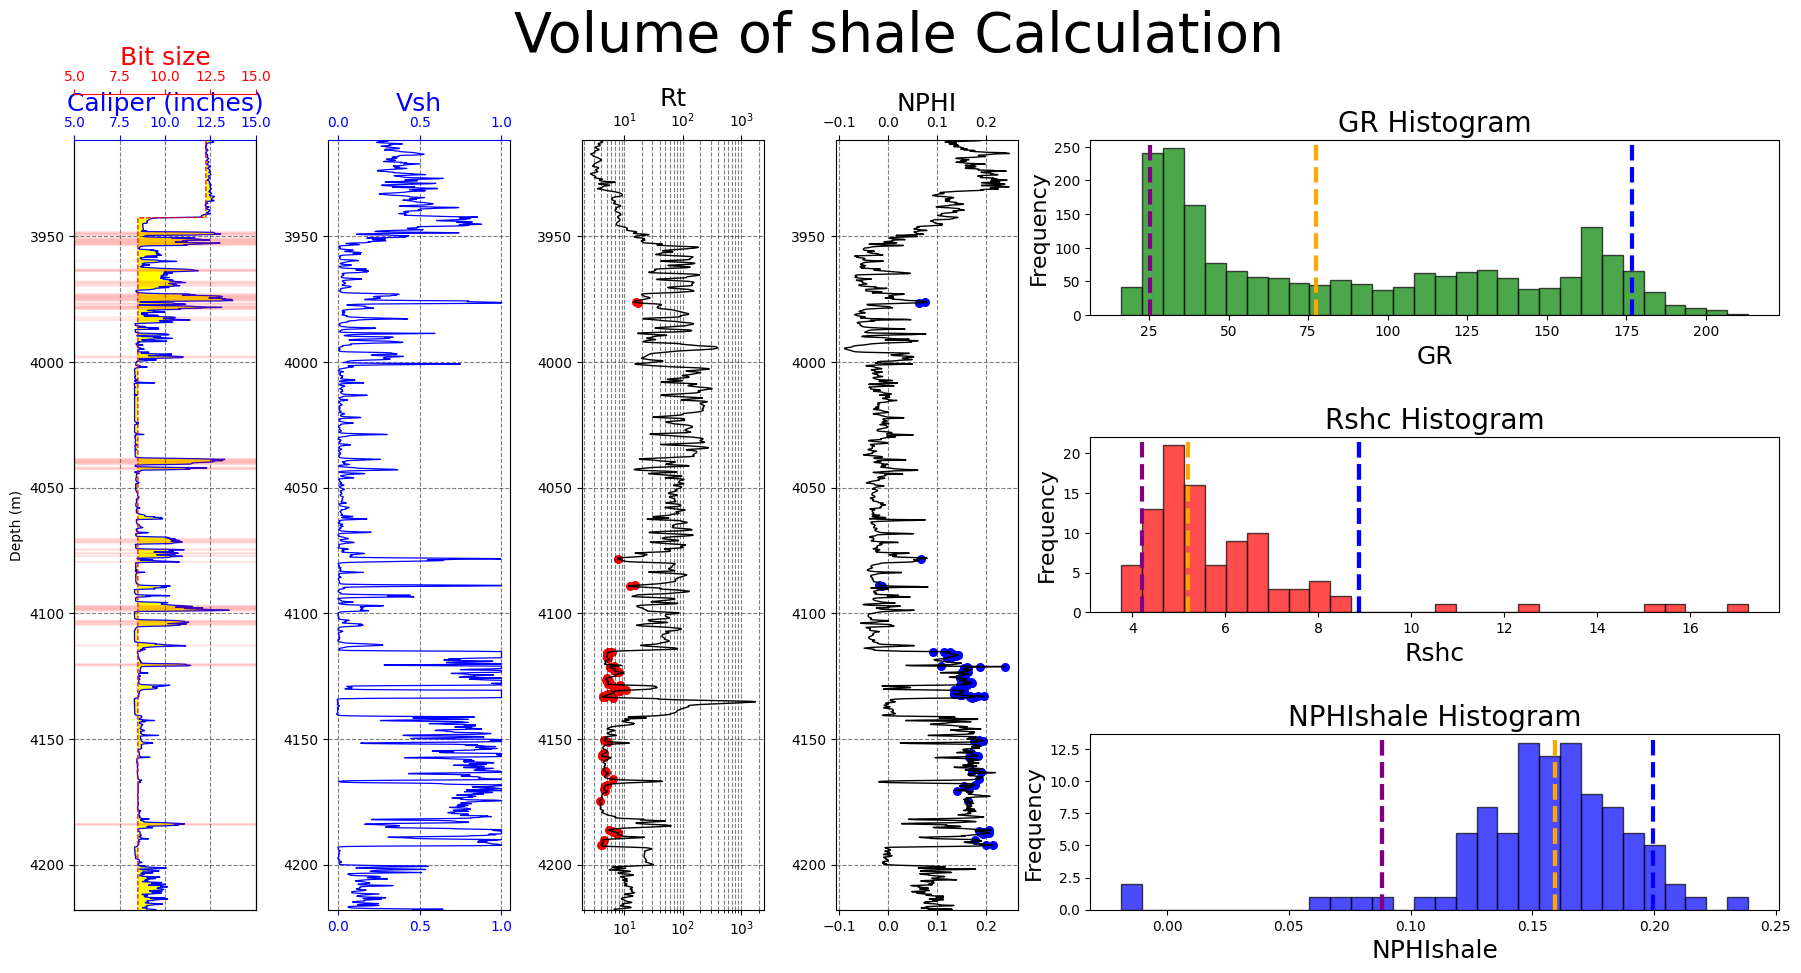

In [72]:
import matplotlib.pyplot as plt

# Create a new figure
fig = plt.figure(figsize=(22, 10))

# Define grid layout
grid = plt.GridSpec(8, 7, wspace=0.4, hspace=0.3)

# Create the individual subplots
ax1 = plt.Subplot(fig, grid[0:8, 0])
ax3 = plt.Subplot(fig, grid[0:8, 1])
ax4 = plt.Subplot(fig, grid[0:8, 2])
ax5 = plt.Subplot(fig, grid[0:8, 3])
ax6 = plt.Subplot(fig, grid[0:2, 4:7])
ax7 = plt.Subplot(fig, grid[3:5, 4:7])
ax8 = plt.Subplot(fig, grid[6:8, 4:7])

# Add subplots to the figure
fig.add_subplot(ax1)
fig.add_subplot(ax3)
fig.add_subplot(ax4)
fig.add_subplot(ax5)
fig.add_subplot(ax6)
fig.add_subplot(ax7)
fig.add_subplot(ax8)

ax1.plot(df3uv.CALI, df3uv.DEPTH, lw=0.9, color='blue')
ax1.fill_betweenx(df3uv.DEPTH, df3uv.BS, df3uv.CALI, facecolor='yellow')
ax1.set_xlabel('Caliper (inches)', color='b', fontsize=18)
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(max_value, min_value)  # Reversed the y-axis limits
ax1.set_xlim(5, 15)
ax1.tick_params(axis='x', colors='b',labeltop=True)
ax1.spines['top'].set_edgecolor('b')
ax1.xaxis.set_label_position('top')
ax1.grid(which='both', color='black', axis='both', alpha=0.5, linestyle='--', linewidth=0.8)

ax11 = ax1.twiny()
ax11.plot(df3uv.BS, df3uv.DEPTH, lw=0.9, color='red', linestyle='dashed')
ax11.set_xlim(5, 15)
ax11.tick_params(axis='x', colors='r')
ax11.spines['top'].set_edgecolor('r')
ax11.spines['top'].set_position(("axes", 1.06))
ax11.set_xlabel('Bit size', color='r', fontsize=18)
ax11.xaxis.set_label_position('top')
ax1.xaxis.set_ticks_position('top')

# Check the condition and plot horizontal lines
condition = abs(df3uv.BS - df3uv.CALI) > tol_val
for depth, is_condition_met in zip(df3uv.DEPTH, condition):
    if is_condition_met:
        ax1.axhline(y=depth, color='red', alpha=0.05)

ax3.plot(df3uv.Vsh, df3uv.DEPTH, lw=0.9, color='b')
ax3.set_xlabel('Vsh', color='b', fontsize=18)
ax3.set_ylim(max_value, min_value) 
ax3.tick_params(axis='x', colors='b', top=True,labeltop=True)
ax3.spines['top'].set_edgecolor('b')
ax3.xaxis.set_label_position('top')
ax3.grid(which='both', color='black', axis='both', alpha=0.5, linestyle='--', linewidth=0.8)


import matplotlib.pyplot as plt

# Rshc calculation
x = np.percentile(Vshc, 95)
Rshc = []
Dshc = []
NPsh=[]
condition_good = abs(df3uv['CALI'] - df3uv['BS']) < tol_val

for i in Vshc.index:
    if Vshc.loc[i] >= x and condition_good.loc[i]:
        Rshc.append(df3uv['RESD'].loc[i])
        Dshc.append(df3uv['DEPTH'].loc[i])
        NPsh.append(df3uv['TNPH'].loc[i])

Rshc = np.array(Rshc)
Rshc_mean = Rshc.mean()
ax4.plot(df3uv['RESD'], df3uv['DEPTH'], lw=1, color='black', label='RESD')
ax4.scatter(Rshc, Dshc, s=30, color='red', label='Rsh')
ax4.set_xlabel('Rt', color='black', fontsize=18)
ax4.set_ylim(max_value, min_value) 
ax4.tick_params(axis='x', colors='k', top=True,labeltop=True)
ax4.spines['top'].set_edgecolor('k')
ax4.xaxis.set_label_position('top')
ax4.grid(which='both', color='black', axis='both', alpha=0.5, linestyle='--', linewidth=0.8)
ax4.set_xscale('log')

ax5.plot(df3uv['TNPH'], df3uv['DEPTH'], lw=1, color='black', label='RESD')
ax5.scatter(NPsh, Dshc, s=30, color='b', label='Rsh')
ax5.set_xlabel('NPHI', color='k', fontsize=18)
ax5.set_ylim(max_value, min_value) 
ax5.tick_params(axis='x', colors='k', top=True,labeltop=True)
ax5.spines['top'].set_edgecolor('k')
ax5.xaxis.set_label_position('top')
ax5.grid(which='both', color='black', axis='both', alpha=0.5, linestyle='--', linewidth=0.8)


# Define your data
data_gr = df3uv['GR']
data_rshc = Rshc
data_nphi_shale = NPsh
# Plot histograms
ax6.hist(data_gr, bins=30, color='green', alpha=0.7, edgecolor='black')
ax6.set_xlabel('GR', fontsize=18)
ax6.set_ylabel('Frequency', fontsize=16)
ax6.set_title('GR Histogram', fontsize=20)

ax7.hist(data_rshc, bins=30, color='red', alpha=0.7, edgecolor='black')
ax7.set_xlabel('Rshc', fontsize=18)
ax7.set_ylabel('Frequency', fontsize=16)
ax7.set_title('Rshc Histogram', fontsize=20)

ax8.hist(data_nphi_shale, bins=30, color='blue', alpha=0.7, edgecolor='black')
ax8.set_xlabel('NPHIshale', fontsize=18)
ax8.set_ylabel('Frequency', fontsize=16)
ax8.set_title('NPHIshale Histogram', fontsize=20)

# Add percentile lines and mean line
percentiles_gr = np.percentile(data_gr, [5, 50, 95])
percentiles_rshc = np.percentile(data_rshc, [5, 50, 95])
percentiles_nphi_shale = np.percentile(data_nphi_shale, [5, 50, 95])

ax6.axvline(percentiles_gr[0], color='purple', linestyle='--', label='5th Percentile', lw = 3)
ax6.axvline(percentiles_gr[1], color='orange', linestyle='--', label='50th Percentile (Mean)', lw = 3)
ax6.axvline(percentiles_gr[2], color='blue', linestyle='--', label='95th Percentile', lw = 3)

ax7.axvline(percentiles_rshc[0], color='purple', linestyle='--', label='5th Percentile', lw = 3)
ax7.axvline(percentiles_rshc[1], color='orange', linestyle='--', label='50th Percentile (Mean)', lw = 3)
ax7.axvline(percentiles_rshc[2], color='blue', linestyle='--', label='95th Percentile', lw = 3)

ax8.axvline(percentiles_nphi_shale[0], color='purple', linestyle='--', label='5th Percentile', lw = 3)
ax7.axvline(percentiles_rshc[2], color='blue', linestyle='--', label='95th Percentile', lw = 3)
ax8.axvline(percentiles_nphi_shale[0], color='purple', linestyle='--', label='5th Percentile', lw = 3)

ax8.axvline(percentiles_nphi_shale[1], color='orange', linestyle='--', label='50th Percentile (Mean)', lw = 3)
ax8.axvline(percentiles_nphi_shale[1], color='orange', linestyle='--', label='50th Percentile (Mean)', lw = 3)
ax8.axvline(percentiles_nphi_shale[2], color='blue', linestyle='--', label='95th Percentile', lw = 3)

# Add legend to ax6 (you can add it to other subplots as needed)
# Adjust parameters like rowspan, colspan, and sizes as needed.


plt.suptitle("Volume of shale Calculation", fontsize=40, y=1.01)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.02, 'Quick-look log analysis for gas bearing zone ')

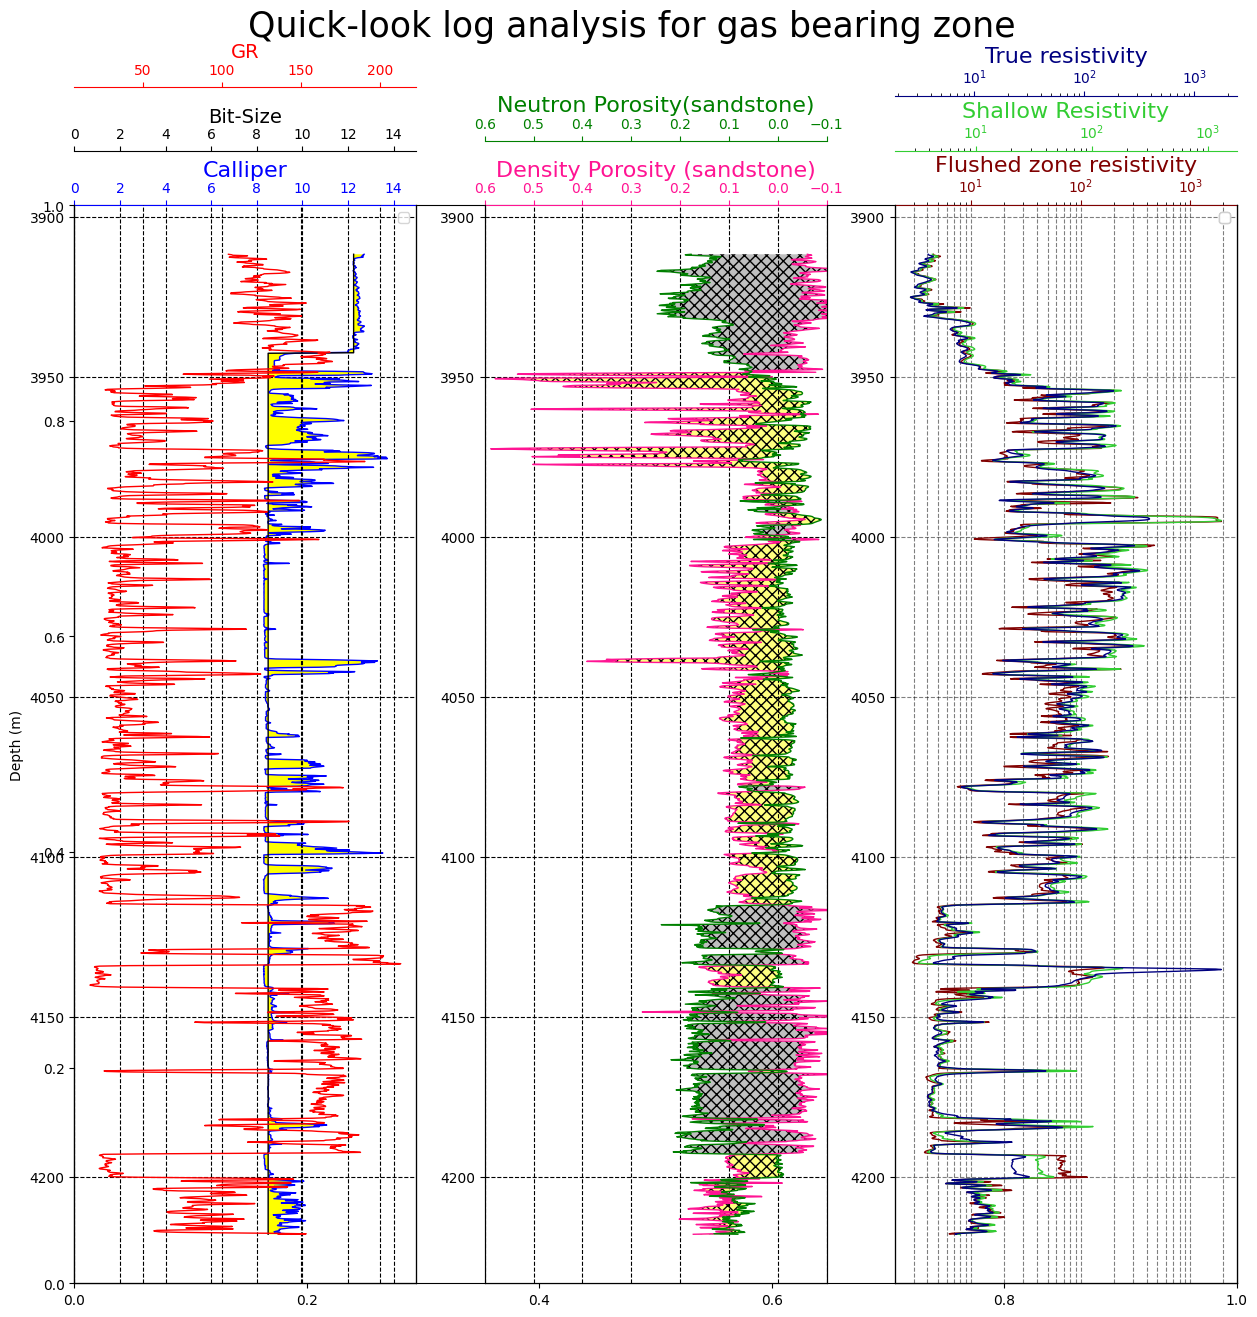

In [73]:
# Set up the figure and axes
fig, axes = plt.subplots(figsize=(15,14))

# Set up individual log tracks/subplots
ax1 = plt.subplot2grid((1, 3), (0, 0), rowspan=1, colspan=1)
ax11 = ax1.twiny()
ax12 = ax1.twiny()
ax3 = plt.subplot2grid((1, 3), (0, 1), rowspan=1, colspan=1)
ax31 = ax3.twiny()
ax4 = plt.subplot2grid((1, 3), (0, 2), rowspan=1, colspan=1)
ax41 = ax4.twiny()
ax42 = ax4.twiny()

# Set up the log tracks
ax1.plot(df3uv['CALI'], df3uv['DEPTH'], color='b', lw=1)
ax1.set_xlim(0, 15)
ax1.invert_yaxis()
ax1.tick_params(axis='x', colors='b')
ax1.spines['top'].set_edgecolor('b')
ax1.xaxis.set_ticks_position('top')
ax1.set_xlabel('Calliper', color='b', fontsize=16)
ax1.xaxis.set_label_position('top')
ax1.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)
ax1.set_ylabel('Depth (m)')
ax11.plot(df3uv['BS'], df3uv['DEPTH'], color='k', lw=1)
ax11.set_xlim(0, 15)
ax11.legend()
ax11.axvline(p05, color='g', label='p05')
ax11.axvline(p95, color='g', label='p95')
ax11.spines['top'].set_position(("axes", 1.05))
ax11.xaxis.set_ticks_position('top')
ax11.set_xlabel('Bit-Size', fontsize=14)
ax11.xaxis.set_label_position('top')
ax1.fill_betweenx(df3uv.DEPTH, df3uv.BS, df3uv.CALI, facecolor='yellow')
ax12.plot(df3uv['GR'], df3uv['DEPTH'], color='r', lw=1)
ax12.tick_params(axis='x', colors='r')
ax12.spines['top'].set_edgecolor('r')
ax12.spines['top'].set_position(("axes", 1.11))
ax12.xaxis.set_ticks_position('top')
ax12.set_xlabel('GR', color='r', fontsize=14)
ax12.xaxis.set_label_position('top')
ax12.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)



condition=df3uv['DPHI_sandstone_nc']>df3uv['TNPH']
condition_shale=df3uv['DPHI_sandstone_nc']<df3uv['TNPH']
ax3.plot(df3uv.RHOB, df3uv.DEPTH, lw=0.7, color='magenta')
ax3.fill_betweenx(df3uv.DEPTH, df3uv['DPHI_sandstone_nc'], df3uv['TNPH'],where=condition,facecolor='yellow',hatch='xxx',alpha=0.5)
ax3.fill_betweenx(df3uv.DEPTH, df3uv['DPHI_sandstone_nc'], df3uv['TNPH'],where=condition_shale,facecolor='grey',hatch='xxx',alpha=0.5)



ax3.plot(df3uv['DPHI_sandstone_nc'], df3uv['DEPTH'], color='deeppink', lw=1)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.tick_params(axis='x', colors='deeppink')
ax3.spines['top'].set_edgecolor('deeppink')
ax3.xaxis.set_ticks_position('top')
ax3.set_xlabel('Density Porosity (sandstone)', color='deeppink', fontsize=16)
ax3.xaxis.set_label_position('top')
ax3.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)
ax3.set_xlim(0.6,-0.1)

ax31.plot(df3uv['TNPH'], df3uv['DEPTH'], color='g', lw=1)
ax31.invert_xaxis()
ax31.tick_params(axis='x', colors='g')
ax31.spines['top'].set_edgecolor('g')
ax31.spines['top'].set_position(("axes", 1.06))
ax31.set_xlabel('Neutron Porosity(sandstone)', color='g', fontsize=16)
ax31.xaxis.set_label_position('top')
ax31.set_xlim(0.6,-0.1)

ax4.plot(df3uv['RESS'], df3uv['DEPTH'], color='maroon', lw=1)
ax4.invert_yaxis()
ax4.tick_params(axis='x', colors='maroon')
ax4.spines['top'].set_edgecolor('maroon')
ax4.xaxis.set_ticks_position('top')
ax4.set_xlabel('Flushed zone resistivity', color='maroon', fontsize=16)
ax4.xaxis.set_label_position('top')
ax4.grid(which='both', color='black', axis='both', alpha=0.5, linestyle='--', linewidth=0.8)
ax4.semilogx()
ax4.legend()

ax41.plot(df3uv['RESM'], df3uv['DEPTH'], color='limegreen', lw=1)
ax41.invert_yaxis()
ax41.tick_params(axis='x', colors='limegreen')
ax41.spines['top'].set_edgecolor('limegreen')
ax41.spines['top'].set_position(("axes", 1.05))
ax41.set_xlabel('Shallow Resistivity', color='limegreen', fontsize=16)
ax41.xaxis.set_label_position('top')
ax41.semilogx()
ax41.legend()

ax42.plot(df3uv['RESD'], df3uv['DEPTH'], color='navy', lw=1)
ax42.invert_yaxis()
ax42.spines['top'].set_edgecolor('navy')
ax42.spines['top'].set_position(("axes", 1.101))
ax42.tick_params(axis='x', colors='navy')
ax42.set_xlabel('True resistivity', color='navy', fontsize=16)
ax42.semilogx()
ax42.legend()
plt.suptitle("Quick-look log analysis for gas bearing zone ", fontsize=25, y=1.02)

In [75]:
# Load the core data which is  cleaned for the NaN value  from the Excel file 
core_depporper = pd.read_excel(r"D:\Case study\Core_data.xlsx")

# Get column names as a list 
column_names = core_depporper.columns.tolist()

# Print the column names 
print("Column names:", column_names)


# Access the 'Top depth (m)' column as an array (column vector)
top_depth_data_cl = core_depporper['Top depth (m)']
porosity_cl = core_depporper['Porosity (%)']
permeability_cl = core_depporper['Permeability (mD)']


# filtering the dat based on the depth range of the Upper Vulcan formation 
depth_range_filter = (top_depth_data_cl >= 3911.5) & (top_depth_data_cl <= 4218)

# Data set of upper vulcan formation: depth,porosity,permeability
depth_cl = top_depth_data_cl[depth_range_filter]
porosity_vulcan_cl = porosity_cl[depth_range_filter]
permeability_vulcan_cl = permeability_cl[depth_range_filter]

Column names: ['Well', 'Basin', 'Field', 'Top depth (m)', 'Base depth (m)', 'Porosity (%)', 'Porosity method', 'Permeability (mD)', 'Permeability method', 'Bulk density (g/cc)', 'Core number', 'Grain density (g/cc)', 'Nob pressure (Kpa)', 'Sample Id', 'Analysis method', 'Remarks']


In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression


min_positive_value = 1e-3
y = np.log10(np.maximum(permeability_vulcan_cl, min_positive_value)).values.reshape(-1, 1)
x = porosity_vulcan_cl.values.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
r21 = model.score(x, y)
r21
print('model score: ' + str(r21))
regression_eq = f'10^({model.coef_[0][0]:.4f} * CPOR + ({model.intercept_[0]:.4f}))'
print('Regression Equation: ' + regression_eq)

x_plot_vals = np.arange(4,20)
y_pred = model.predict(x_plot_vals.reshape(-1,1))
y_pred_log = 10**y_pred
results_df = pd.DataFrame({'por_vals': x_plot_vals, 'perm_vals': y_pred_log.flatten()})


p = plt.scatter(x=porosity_vulcan, y=permeability_vulcan, c=depth_uv, cmap='YlOrRd', s=50)
plt.plot(results_df['por_vals'], results_df['perm_vals'], color='black')
plt.semilogy()
plt.ylabel('Core Permeability (mD)', fontsize=12, fontweight='bold')
plt.xlabel('Core Porosity (%)', fontsize=12, fontweight='bold');
plt.title(f'Core Permeability= {regression_eq}', fontsize=13,color='green')
plt.suptitle('Porosity - Permeability Relation           ', fontsize=14,color='navy',y=1.02)
colorbar = plt.colorbar(p)
colorbar.set_label('Depth (m)', fontsize=12)  # Set the label for the color bar

In [67]:

# Linear regression coefficients
slope = 0.2963
intercept = -3.5193

# Calculate permeability
Perm_SLR = 10**(slope * (df3uv['TPHI_corr'] * 100) + intercept)
df3uv['Perm_SRL']=Perm_SLR 

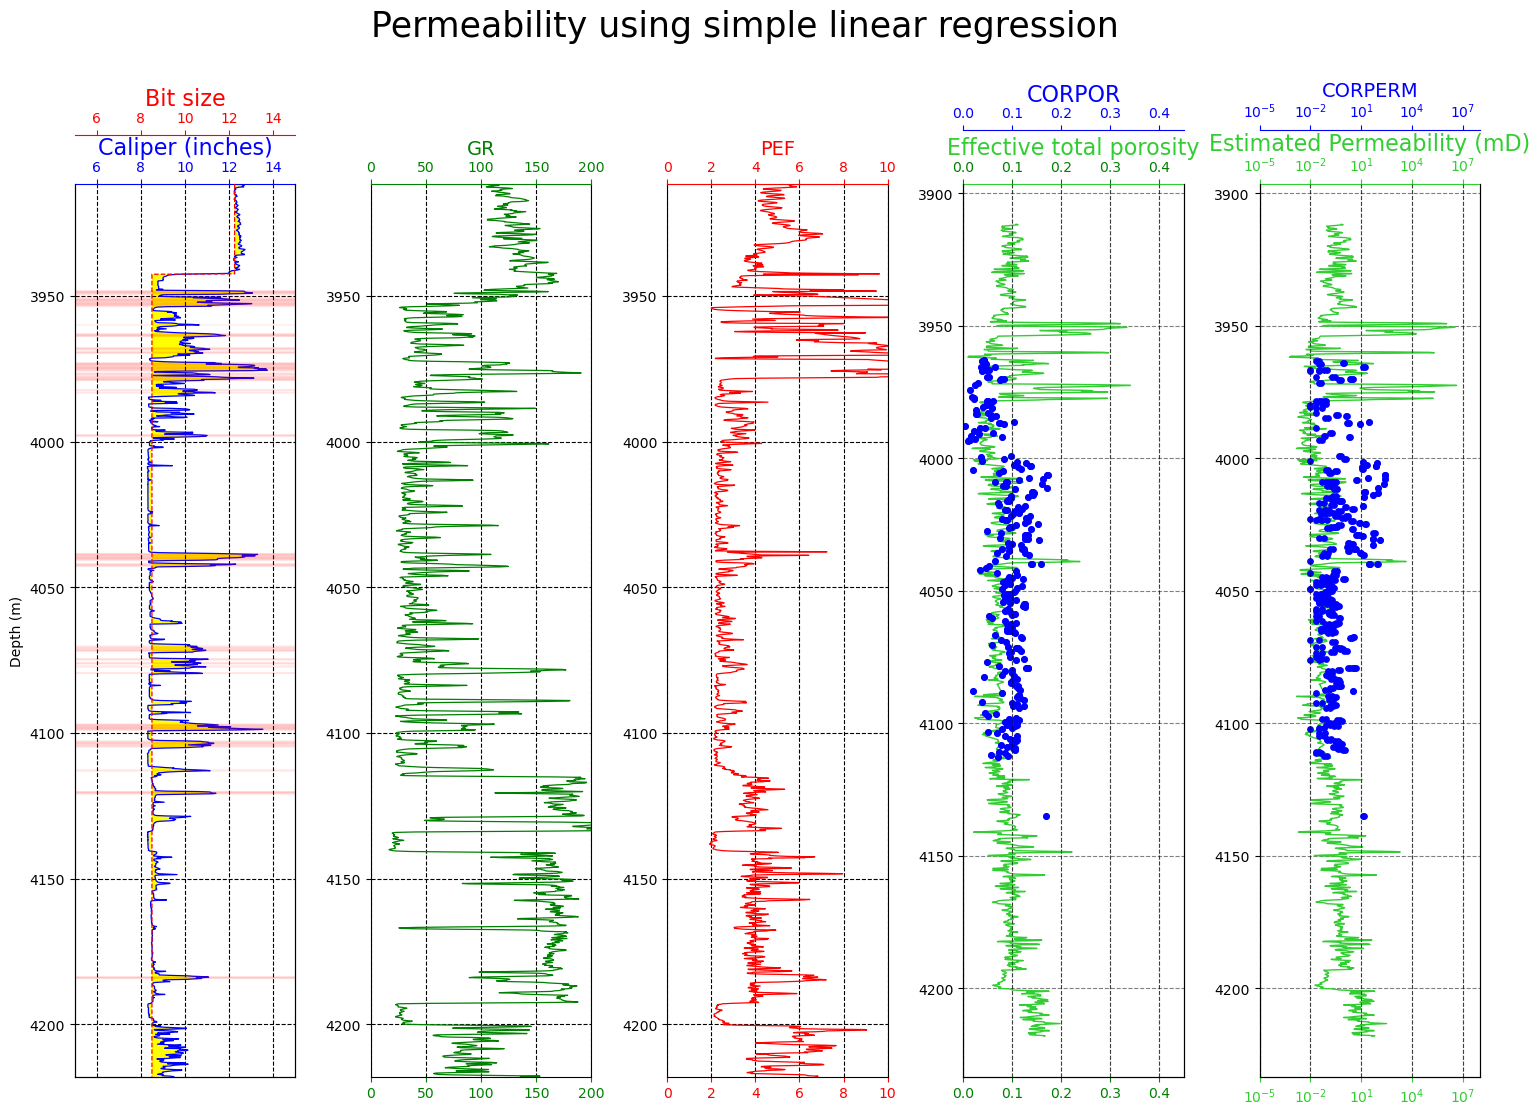

In [68]:
import matplotlib.pyplot as plt

# Create a new figure
fig, axes = plt.subplots(figsize=(15, 11))

# Create axes
ax1 = plt.subplot2grid((1, 5), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 5), (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 5), (0, 2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1, 5), (0, 3), rowspan=1, colspan=1)
ax41 = ax4.twiny()  # Create a twin x-axis for ax4
ax5 = plt.subplot2grid((1, 5), (0, 4), rowspan=1, colspan=1)
ax51 = ax5.twiny()  # Create a twin x-axis for ax5

ax1.plot(df3uv.CALI, df3uv.DEPTH, lw=0.9, color='blue')
ax1.fill_betweenx(df3uv.DEPTH, df3uv.BS, df3uv.CALI, facecolor='yellow')
ax1.set_xlabel('Caliper (inches)', color='b', fontsize=16)
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(max_value, min_value)  # Reversed the y-axis limits
ax1.set_xlim(5, 15)
ax1.tick_params(axis='x', colors='b',labeltop=True)
ax1.spines['top'].set_edgecolor('b')
ax1.xaxis.set_label_position('top')
ax1.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)

ax11 = ax1.twiny()
ax11.plot(df3uv.BS, df3uv.DEPTH, lw=0.9, color='red', linestyle='dashed')
ax11.set_xlim(5, 15)
ax11.tick_params(axis='x', colors='r')
ax11.spines['top'].set_edgecolor('r')
ax11.spines['top'].set_position(("axes", 1.055))
ax11.set_xlabel('Bit size', color='r', fontsize=16)
ax11.xaxis.set_label_position('top')
ax1.xaxis.set_ticks_position('top')

# Check the condition and plot horizontal lines
condition = abs(df3uv.BS - df3uv.CALI) > tol_val
for depth, is_condition_met in zip(df3uv.DEPTH, condition):
    if is_condition_met:
        ax1.axhline(y=depth, color='red', alpha=0.05)

ax2.plot(df3uv.GR, df3uv.DEPTH, lw=0.9, color='green')
ax2.set_xlabel('GR', color='green', fontsize=14)
ax2.set_ylim(max_value, min_value)  # Reversed the y-axis limits
# Move tick labels and tick marks to the top of the curve in ax2
ax2.tick_params(axis='x', colors='green', top=True,labeltop=True)
ax2.spines['top'].set_edgecolor('green')
ax2.xaxis.set_label_position('top')
ax2.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)
ax2.set_xlim(0, 200)
# Plot DPHI - Line Plot
ax3.plot(df3uv['PEF'], df3uv['DEPTH'], linewidth=0.9, color='r')
ax3.set_xlabel('PEF', color='r', fontsize=14)
ax3.set_ylim(max_value, min_value)  # Reversed the y-axis limits
ax3.tick_params(axis='x', colors='r', top=True,labeltop=True)
ax3.spines['top'].set_edgecolor('r')
ax3.xaxis.set_label_position('top')
ax3.grid(which='both', color='black', axis='both', alpha=1, linestyle='--', linewidth=0.8)
ax3.set_xlim(0, 10)
# Plot Porosity vs. DPHI
ax4.plot(df3uv['TPHI_eff'], df3uv['DEPTH'], color='limegreen', lw=1)
ax4.invert_yaxis()
ax4.tick_params(axis='x', colors='limegreen')
ax4.spines['top'].set_edgecolor('limegreen')
ax4.spines['top'].set_position(("axes", 1.0))
ax4.set_xlabel('Effective total porosity', color='limegreen', fontsize=16)
ax4.xaxis.set_label_position('top')
ax4.grid(which='both', color='black', axis='both', alpha=0.5, linestyle='--', linewidth=0.8)
ax4.tick_params(axis='x', colors='green', top=True,labeltop=True)
ax4.set_xlim(0,0.45)
ax41.scatter(porosity_vulcan_cl*0.01, depth_cl, color='b', lw=1, s=15)  # Use ax41 for scatter plot
ax41.tick_params(axis='x', colors='b')
ax41.spines['top'].set_edgecolor('b')
ax41.spines['top'].set_position(("axes", 1.06))
ax41.set_xlabel('CORPOR', color='b', fontsize=16)
ax41.xaxis.set_label_position('top')
ax41.grid(which='both', color='black', axis='both', alpha=0.5, linestyle='--', linewidth=0.8)
ax41.set_xlim(0,0.45)
# Plot Porosity vs. DPHI
ax5.plot(Perm_SLR, df3uv['DEPTH'], color='limegreen', lw=1)
ax5.invert_yaxis()
ax5.tick_params(axis='x', colors='limegreen',top=True,labeltop=True)
ax5.spines['top'].set_edgecolor('limegreen')
ax5.spines['top'].set_position(("axes", 1.0))
ax5.set_xlabel('Estimated Permeability (mD)', color='limegreen', fontsize=16)
ax5.xaxis.set_label_position('top')
ax5.grid(which='both', color='black', axis='both', alpha=0.5, linestyle='--', linewidth=0.8)
ax5.set_xlim(10**-5,10**8)
ax51.scatter(permeability_vulcan_cl, depth_cl, color='b', lw=1, s=15)  # Use ax51 for scatter plot
ax51.tick_params(axis='x', colors='b',labeltop=True)
ax51.spines['top'].set_edgecolor('b')
ax51.spines['top'].set_position(("axes", 1.06))
ax51.set_xlabel('CORPERM', color='b', fontsize=14)
ax51.xaxis.set_label_position('top')
ax51.grid(which='both', color='black', axis='both', alpha=0.5, linestyle='--', linewidth=0.8)
ax5.semilogx()
ax51.semilogx()
ax51.set_xlim(10**-5,10**8)
plt.suptitle("Permeability using simple linear regression", fontsize=25, y=1.01)
plt.tight_layout()
plt.show()


In [69]:
df3uv['Perm_SRL'].describe()

count    2.0110000000e+03
mean     7.4077987688e+03
std      1.2977275155e+05
min      5.8045238570e-04
25%      3.1041874654e-02
50%      1.0466724386e-01
75%      6.0488834018e-01
max      4.1691689938e+06
Name: Perm_SRL, dtype: float64

In [70]:
import pandas as pd

# Assuming your DataFrame is named df3uv
summary_stats = df3uv['Perm_SRL'].describe()

# Define the file path
file_path = r"C:\Users\Ritesh\OneDrive\Desktop\summary_stats.xlsx"

# Export the summary statistics to an Excel file
summary_stats.to_excel(file_path, header=False)


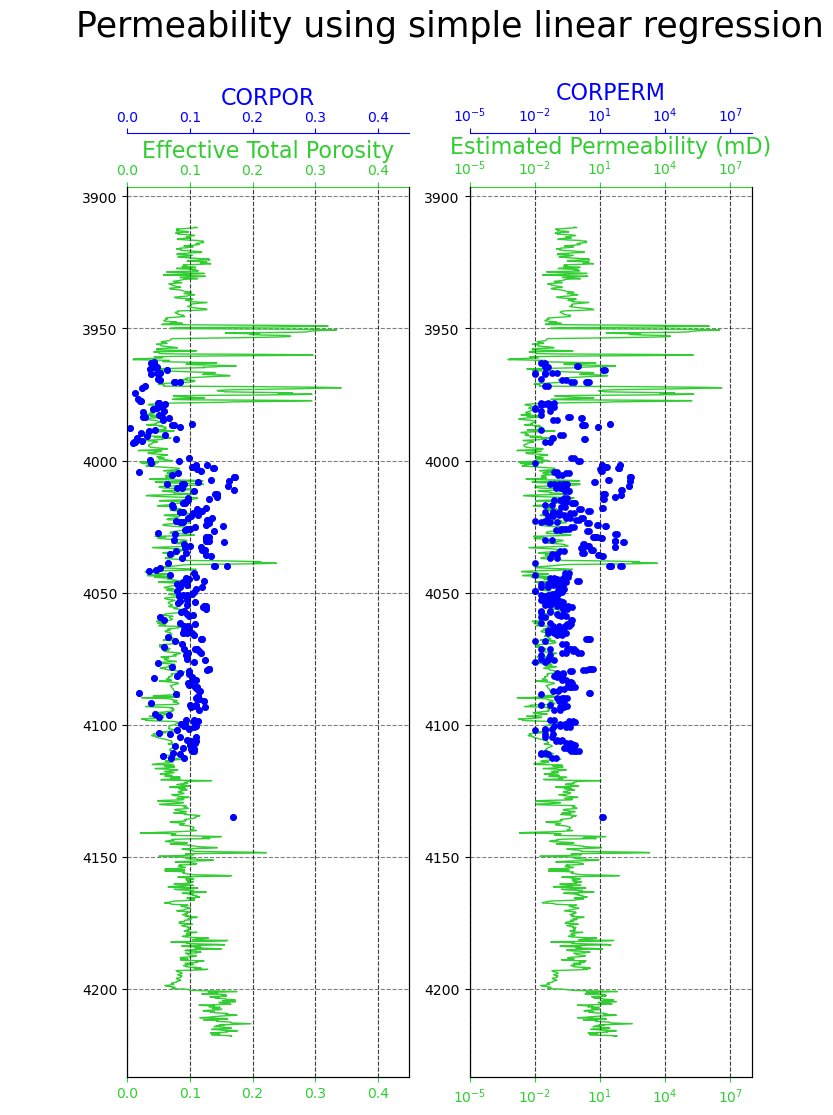

In [71]:
import matplotlib.pyplot as plt

# Create a new figure
fig, axes = plt.subplots(figsize=(7, 11))

# Create axes
ax4 = plt.subplot2grid((1, 2), (0, 0), rowspan=1, colspan=1)  # Adjust the grid position
ax41 = ax4.twiny()  # Create a twin x-axis for ax4
ax5 = plt.subplot2grid((1, 2), (0, 1), rowspan=1, colspan=1)  # Adjust the grid position
ax51 = ax5.twiny()  # Create a twin x-axis for ax5

# Plot Effective Total Porosity vs Depth
ax4.plot(df3uv['TPHI_eff'], df3uv['DEPTH'], color='limegreen', lw=1)
ax4.invert_yaxis()
ax4.tick_params(axis='x', colors='limegreen')
ax4.spines['top'].set_edgecolor('limegreen')
ax4.spines['top'].set_position(("axes", 1.0))
ax4.set_xlabel('Effective Total Porosity', color='limegreen', fontsize=16)
ax4.xaxis.set_label_position('top')
ax4.grid(which='both', color='black', axis='both', alpha=0.5, linestyle='--', linewidth=0.8)
ax4.tick_params(axis='x', colors='limegreen', top=True, labeltop=True)
ax4.set_xlim(0, 0.45)

# Scatter Plot for CORPOR on twin x-axis (ax41)
ax41.scatter(porosity_vulcan_cl * 0.01, depth_cl, color='b', lw=1, s=15)  # Use ax41 for scatter plot
ax41.tick_params(axis='x', colors='b', labeltop=True)
ax41.spines['top'].set_edgecolor('b')
ax41.spines['top'].set_position(("axes", 1.06))
ax41.set_xlabel('CORPOR', color='b', fontsize=16)
ax41.xaxis.set_label_position('top')
ax41.grid(which='both', color='black', axis='both', alpha=0.5, linestyle='--', linewidth=0.8)
ax41.set_xlim(0, 0.45)

# Plot Estimated Permeability vs Depth
ax5.plot(Perm_SLR, df3uv['DEPTH'], color='limegreen', lw=1)
ax5.invert_yaxis()
ax5.tick_params(axis='x', colors='limegreen', top=True, labeltop=True)
ax5.spines['top'].set_edgecolor('limegreen')
ax5.spines['top'].set_position(("axes", 1.0))
ax5.set_xlabel('Estimated Permeability (mD)', color='limegreen', fontsize=16)
ax5.xaxis.set_label_position('top')
ax5.grid(which='both', color='black', axis='both', alpha=0.5, linestyle='--', linewidth=0.8)
ax5.set_xlim(10**-5, 10**8)

# Scatter Plot for CORPERM on twin x-axis (ax51)
ax51.scatter(permeability_vulcan_cl, depth_cl, color='b', lw=1, s=15)  # Use ax51 for scatter plot
ax51.tick_params(axis='x', colors='b', labeltop=True)
ax51.spines['top'].set_edgecolor('b')
ax51.spines['top'].set_position(("axes", 1.06))
ax51.set_xlabel('CORPERM', color='b', fontsize=16)
ax51.xaxis.set_label_position('top')
ax51.grid(which='both', color='black', axis='both', alpha=0.5, linestyle='--', linewidth=0.8)
ax5.semilogx()
ax51.semilogx()
ax51.set_xlim(10**-5, 10**8)

# Set suptitle and adjust the layout
plt.suptitle("      Permeability using simple linear regression", fontsize=25, y=1.01)
plt.tight_layout()
plt.show()
